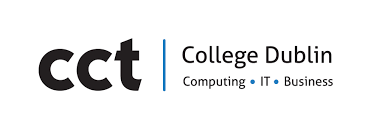

# <b> CA3 Capstone Project <b>
Student Full Name:   Parhad Keyim Idikut <br>
Student Number:      sba24185 <br>
Module Title:        Strategic Thinking  <br>
Assessment Due Date: 18 May 2025 <br>
Date of Submission:  15 May 2025 <br> 

# <b> Inbound Tourism to Ireland: Using Machine Learning to Predict Demand <b>

## <b> 1. Introduction  <b>

See the CA3 Word report

## <b> 2. Strategic Overview of the business problem  <b>

See the CA3 Word report:
- 2.1	General Goal and Problem Definition
- 2.2	Scope 
- 2.3	Document Processes
- 2.4	Ethical Considerations
- 2.5	Project Plan

## <b> 3. Business Understanding: Irish Inbound Tourism <b>

See the CA3 Word report

## <b> 4. Technologies Used <b>
See the CA3 Word report
- 4.1	Libraries
- 4.2	Models and Machine Learning Algorithms

## <b> 5. Data Understanding  <b>
See the C3 Word report
- 5.1 Data Sources/Acknowledgements
- 5.2 Descriptive Statistics and Findings

- For this project, the following datasets are acquired from the official statistics of the Central Statistics Office of Ireland. The datasets are open source for non-commercial use.
- Central Statistics Office. (2020a) TMA09 - Overseas Trips (incl. Expenditure) to Ireland - data.gov.ie (Date updated 2020-09-15). Available at: https://data.gov.ie/dataset/tma09-overseas-trips-incl-expenditure-to-ireland  (Accessed: 20 October 2024).
- Central Statistics Office. (2020b) TMA06 - Overseas Visits to Ireland (Date updated 2020-05-14). Available at: https://data.cso.ie/ (Accessed: 13 April 2025).

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read csv file into a pandas dataframe
tourism = pd.read_csv('TMA09.csv')

In [3]:
tourism.head()

,C02173V02619,Area of Residence,TLIST(A1),Year,STATISTIC,Statistic Label,UNIT,VALUE
0,-,All Countries,2009,2009,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6907.0
1,-,All Countries,2009,2009,TMA09C2,Average Length of Stay by Overseas Travellers ...,Nights,7.6
2,-,All Countries,2009,2009,TMA09C3,Expenditure by Overseas Travellers in Ireland ...,Euro Million,3410.0
3,-,All Countries,2010,2010,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6139.0
4,-,All Countries,2010,2010,TMA09C2,Average Length of Stay by Overseas Travellers ...,Nights,7.8


In [4]:
# looking at the dataset
tourism.shape
                    # This dataset has 297 observations and 8 variables as demostrated below.

(297, 8)

In [5]:
# Check duplicate rows
tourism_duplicate_rows = tourism[tourism.duplicated()]
print("Number of duplicate rows: ", tourism_duplicate_rows.shape)
                                                                # The are not duplicate rows.

Number of duplicate rows:  (0, 8)


In [6]:
# View summary of dataset
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C02173V02619       297 non-null    object 
 1   Area of Residence  297 non-null    object 
 2   TLIST(A1)          297 non-null    int64  
 3   Year               297 non-null    int64  
 4   STATISTIC          297 non-null    object 
 5   Statistic Label    297 non-null    object 
 6   UNIT               297 non-null    object 
 7   VALUE              273 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 18.7+ KB


In [7]:
# To check any missing values in this data frame.
print("Missing values in each column:")
tourism.isnull().sum()
                        # There are 24 missing values in the columns called "VALUE"

Missing values in each column:


C02173V02619          0
Area of Residence     0
TLIST(A1)             0
Year                  0
STATISTIC             0
Statistic Label       0
UNIT                  0
VALUE                24
dtype: int64

### Summary statistics

In [8]:
# Summary statistics of numerical columns
tourism.describe()

,TLIST(A1),Year,VALUE
count,297.000000,297.000000,273.000000
mean,2014.000000,2014.000000,978.545788
std,3.167615,3.167615,1835.365064
min,2009.000000,2009.000000,4.100000
25%,2011.000000,2011.000000,10.000000
50%,2014.000000,2014.000000,268.000000
75%,2017.000000,2017.000000,935.000000
max,2019.000000,2019.000000,10808.000000


In [9]:
# Summary statistics of all the columns
tourism.describe(include = 'all')

,C02173V02619,Area of Residence,TLIST(A1),Year,STATISTIC,Statistic Label,UNIT,VALUE
count,297,297,297.000000,297.000000,297,297,297,273.000000
unique,9,9,NaN,NaN,3,3,3,NaN
top,-,All Countries,NaN,NaN,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,NaN
freq,33,33,NaN,NaN,99,99,99,NaN
mean,NaN,NaN,2014.000000,2014.000000,NaN,NaN,NaN,978.545788
std,NaN,NaN,3.167615,3.167615,NaN,NaN,NaN,1835.365064
min,NaN,NaN,2009.000000,2009.000000,NaN,NaN,NaN,4.100000
25%,NaN,NaN,2011.000000,2011.000000,NaN,NaN,NaN,10.000000
50%,NaN,NaN,2014.000000,2014.000000,NaN,NaN,NaN,268.000000
75%,NaN,NaN,2017.000000,2017.000000,NaN,NaN,NaN,935.000000


# Descriptive statistics and data visualization

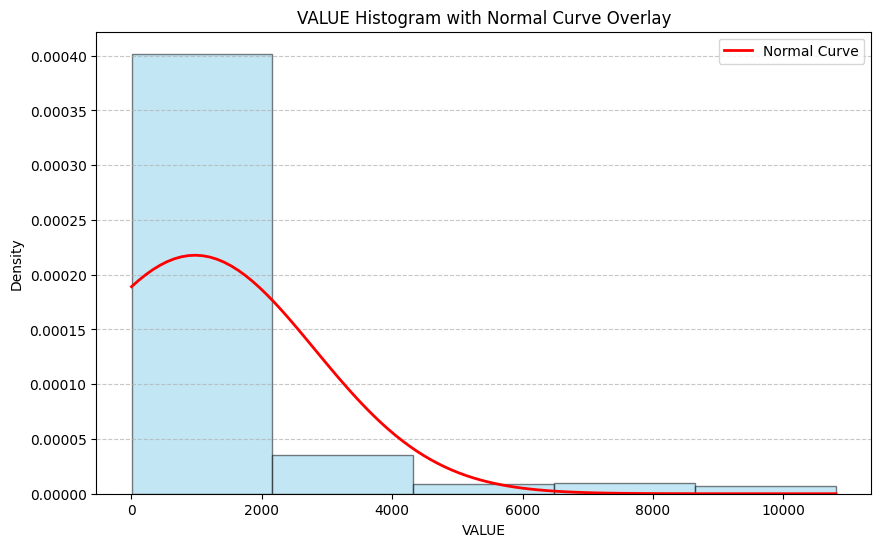

In [10]:
tourism1 = tourism.copy()
tourism1.dropna(ignore_index=True, inplace=True)
# Create histogram of target feature called "VALUE"
from scipy import stats
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(tourism1['VALUE'], bins=5, density=True, color='skyblue', edgecolor='black', alpha=0.5)

# Fit a normal distribution to the data
mu, std = stats.norm.fit(tourism1['VALUE'])

# Create a range of x values for the normal curve
x = np.linspace(min(tourism1['VALUE']), max(tourism1['VALUE']), 100)

# Create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('VALUE')
plt.ylabel('Density')
plt.title('VALUE Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Hypothesis
- H0: "VALUE" is normally distributed
- H1 "VALUE" is not normally distributed

In [11]:
# Shapiro-Wilk Test
stat, p_value = stats.shapiro(tourism1['VALUE'])
print(f'Statistic: {stat}, p-value: {p_value}')

if p_value >= 0.05:
    print("Sample appears to be normally distributed.")
else:
    print("Sample does not appear to be normally distributed.")

Statistic: 0.5672665238380432, p-value: 1.597972732695662e-25
Sample does not appear to be normally distributed.


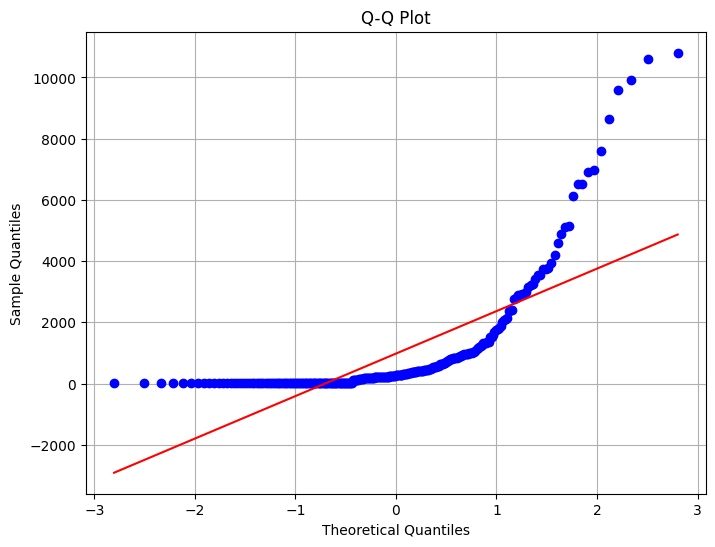

In [12]:
# A Q-Q (quantile-quantile) plot is a graphical tool to assess if a dataset follows a specified distribution (usually normal).
# Step 2: Create a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(tourism1['VALUE'], dist="norm", plot=plt)

# Step 3: Add titles and labels
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Step 4: Show the plot
plt.grid()
plt.show()

## Inferential Statistics: hypothesis tests

In [13]:
# pip install statsmodels

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import scipy.stats as stats
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

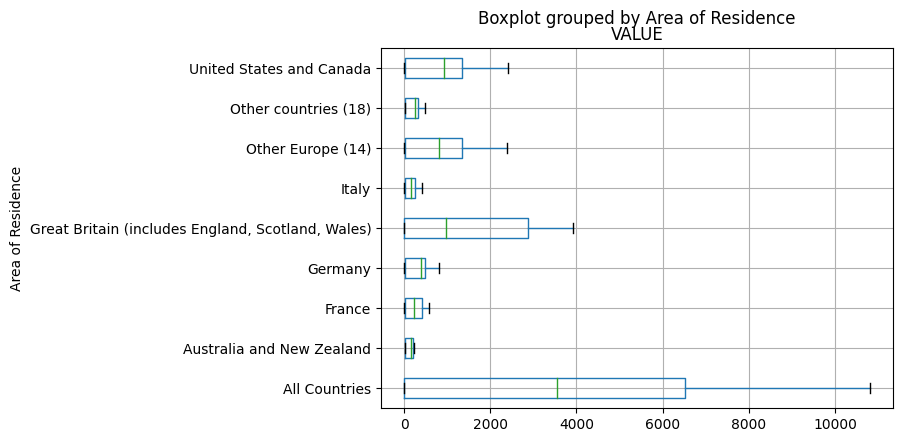

In [15]:
# Create a box plot
tourism1.boxplot(by="Area of Residence", column="VALUE",vert=False);

## TWO-WAY ANOVA

In [16]:
tourism1.drop(['C02173V02619', 'TLIST(A1)', 'Statistic Label', 'UNIT'], axis=1, inplace=True)
tourism1.rename(columns={'Area of Residence':'Residence', 'STATISTIC':'TouristsToIreland'}, inplace=True)

In [17]:
# Fit the model for TWO-WAY ANOVA
model = ols('VALUE ~ C(Residence) + C(TouristsToIreland) + C(Residence):C(TouristsToIreland)' , data=tourism1).fit()

anova_table = sm.stats.anova_lm(model, typ=1)
anova_table['PR(>F)'] = anova_table['PR(>F)'].round(7)
anova_table

# Significant difference in VALUE by Residence (All countires, Great Britain etc.)  >>> Because P value significantly < 0.05 >>>> accept H0 hypothesis
# Significant difference in VALUE by TouristsToIreland (TouristsNumber,AverageStayNights,TouristsExpenditure) 
                                                                                # >>> Because P value significantly < 0.05 >>>> accept H0 hypothesis
# C(Residence):C(TouristsToIreland) combination >>>>  P value significantly < 0.05 >>>> accept H0 hypothesis

,df,sum_sq,mean_sq,F,PR(>F)
C(Residence),8.0,3.995101e+08,4.993876e+07,250.421645,0.0
C(TouristsToIreland),2.0,1.775096e+08,8.875480e+07,445.067563,0.0
C(Residence):C(TouristsToIreland),16.0,2.901729e+08,1.813581e+07,90.943365,0.0
Residual,246.0,4.905700e+07,1.994187e+05,NaN,NaN


<b> ##################################################################################################################

## <b> 6. Data Preparation
See the CA3 Word report
- 6.1	Data Cleansing, Formatting and Exploratory Data Analysis (EDA)
- 6.2	Data Visualization and Identification of Relevant Variables and Features
- descriptive/inferential/correlation statistical analysis, and data visualizations. <b>

In [18]:
# Handling missing values
# Coppy the dataset for conducting further analysis
tourism1 = tourism.copy()

# Drop all observations with missing values
tourism1.dropna(ignore_index=True, inplace=True)
tourism1.info()
                                                    # Missing values 297 - 273 = 24 which is 8.08 % of the whole data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C02173V02619       273 non-null    object 
 1   Area of Residence  273 non-null    object 
 2   TLIST(A1)          273 non-null    int64  
 3   Year               273 non-null    int64  
 4   STATISTIC          273 non-null    object 
 5   Statistic Label    273 non-null    object 
 6   UNIT               273 non-null    object 
 7   VALUE              273 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 17.2+ KB


In [19]:
tourism1.isnull().sum()
                            # There are not missming values anymore

C02173V02619         0
Area of Residence    0
TLIST(A1)            0
Year                 0
STATISTIC            0
Statistic Label      0
UNIT                 0
VALUE                0
dtype: int64

In [20]:
tourism1.head(2)

,C02173V02619,Area of Residence,TLIST(A1),Year,STATISTIC,Statistic Label,UNIT,VALUE
0,-,All Countries,2009,2009,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6907.0
1,-,All Countries,2009,2009,TMA09C2,Average Length of Stay by Overseas Travellers ...,Nights,7.6


In [21]:
# Remove columns
tourism1.drop(['C02173V02619', 'TLIST(A1)', 'Statistic Label', 'UNIT'], axis=1, inplace=True)
tourism1.head(2)

,Area of Residence,Year,STATISTIC,VALUE
0,All Countries,2009,TMA09C1,6907.0
1,All Countries,2009,TMA09C2,7.6


In [22]:
# Rename columns
tourism1.rename(columns={'Area of Residence':'Residence', 'STATISTIC':'TouristsToIreland'}, inplace=True)
tourism1.head()

,Residence,Year,TouristsToIreland,VALUE
0,All Countries,2009,TMA09C1,6907.0
1,All Countries,2009,TMA09C2,7.6
2,All Countries,2009,TMA09C3,3410.0
3,All Countries,2010,TMA09C1,6139.0
4,All Countries,2010,TMA09C2,7.8


In [23]:
# Replace value names in column "TouristsToIreland"
tourism1.replace({'TouristsToIreland' : {'TMA09C1':'TouristsNumber','TMA09C2': 'AverageStayNights', 'TMA09C3' : 'TouristsExpenditure'}} ,inplace=True)
tourism1.head()

,Residence,Year,TouristsToIreland,VALUE
0,All Countries,2009,TouristsNumber,6907.0
1,All Countries,2009,AverageStayNights,7.6
2,All Countries,2009,TouristsExpenditure,3410.0
3,All Countries,2010,TouristsNumber,6139.0
4,All Countries,2010,AverageStayNights,7.8


In [24]:
# Pivot the DataFrame
pivoted_df = tourism1.pivot_table(index=['Year', 'Residence'], columns='TouristsToIreland', values='VALUE')
pivoted_df.reset_index(inplace=True)
pivoted_df.head()

TouristsToIreland,Year,Residence,AverageStayNights,TouristsExpenditure,TouristsNumber
0,2009,All Countries,7.6,3410.0,6907.0
1,2009,"Great Britain (includes England, Scotland, Wales)",4.8,1037.0,3224.0
2,2009,Other Europe (14),9.9,1342.0,2388.0
3,2009,Other countries (18),15.3,309.0,304.0
4,2009,United States and Canada,9.0,722.0,991.0


In [25]:
# remove the column index name TouristsToIreland
pivoted_df.columns.name = None
pivoted_df.head()

,Year,Residence,AverageStayNights,TouristsExpenditure,TouristsNumber
0,2009,All Countries,7.6,3410.0,6907.0
1,2009,"Great Britain (includes England, Scotland, Wales)",4.8,1037.0,3224.0
2,2009,Other Europe (14),9.9,1342.0,2388.0
3,2009,Other countries (18),15.3,309.0,304.0
4,2009,United States and Canada,9.0,722.0,991.0


In [26]:
# create a new column and calculate Expenditure Per Tourist Per Night
pivoted_df['ExpenditurePerTouristPerNight'] = ((pivoted_df['TouristsExpenditure']*1000 / pivoted_df['TouristsNumber']) / pivoted_df['AverageStayNights']).round(2)
pivoted_df.head()
# 1 million = 1000 thousand

,Year,Residence,AverageStayNights,TouristsExpenditure,TouristsNumber,ExpenditurePerTouristPerNight
0,2009,All Countries,7.6,3410.0,6907.0,64.96
1,2009,"Great Britain (includes England, Scotland, Wales)",4.8,1037.0,3224.0,67.01
2,2009,Other Europe (14),9.9,1342.0,2388.0,56.77
3,2009,Other countries (18),15.3,309.0,304.0,66.43
4,2009,United States and Canada,9.0,722.0,991.0,80.95


In [27]:
pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           91 non-null     int64  
 1   Residence                      91 non-null     object 
 2   AverageStayNights              91 non-null     float64
 3   TouristsExpenditure            91 non-null     float64
 4   TouristsNumber                 91 non-null     float64
 5   ExpenditurePerTouristPerNight  91 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.4+ KB


In [28]:
# Group, aggregate, and sort the dataframe
pivoted_df.groupby('Residence')[['AverageStayNights','TouristsExpenditure','TouristsNumber', 'ExpenditurePerTouristPerNight']].mean() \
    .sort_values(by='TouristsExpenditure', ascending=False)

,AverageStayNights,TouristsExpenditure,TouristsNumber,ExpenditurePerTouristPerNight
Residence,,,,
All Countries,7.190909,3901.818182,8203.727273,66.193636
United States and Canada,7.818182,1097.818182,1511.818182,94.285455
"Great Britain (includes England, Scotland, Wales)",4.500000,934.000000,3320.181818,62.923636
Other Europe (14),8.890909,835.636364,1731.818182,54.055455
Germany,8.766667,353.888889,611.444444,66.327778
Other countries (18),14.736364,278.000000,325.454545,57.369091
France,9.155556,239.111111,490.444444,53.132222
Australia and New Zealand,12.066667,181.111111,193.888889,76.855556
Italy,8.733333,150.555556,310.333333,55.812222


<Figure size 1200x800 with 0 Axes>

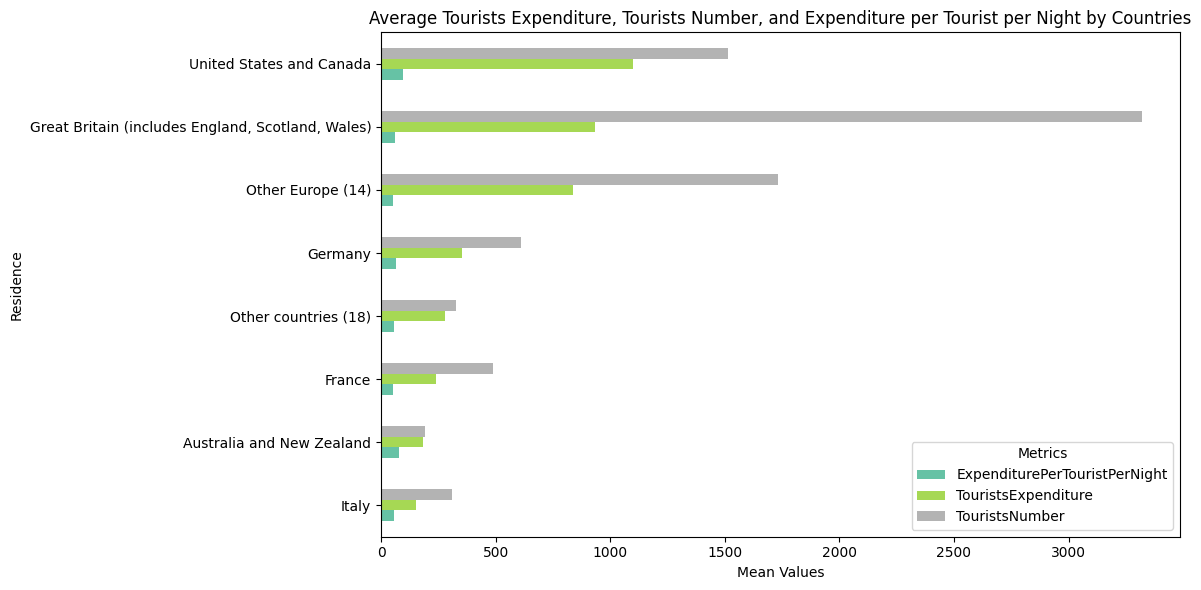

In [29]:
# Drop 'All Countries' from Residence
filtered_df = pivoted_df[pivoted_df['Residence'] != 'All Countries']

# Group by Residence and calculate mean values
sorted_expenditure = filtered_df.groupby('Residence')[['ExpenditurePerTouristPerNight', 'TouristsExpenditure', 'TouristsNumber']].mean() \
    .sort_values(by='TouristsExpenditure', ascending=True)

# Plotting
plt.figure(figsize=(12, 8))
sorted_expenditure.plot(kind='barh',stacked=False, figsize=(12, 6), cmap='Set2')

plt.title('Average Tourists Expenditure, Tourists Number, and Expenditure per Tourist per Night by Countries')
plt.xlabel('Mean Values')
plt.ylabel('Residence')
plt.legend(title='Metrics')
plt.tight_layout()
plt.savefig('Avarage TouristsExpenditure.png', dpi=300, bbox_inches="tight"); # save as high resolution image;

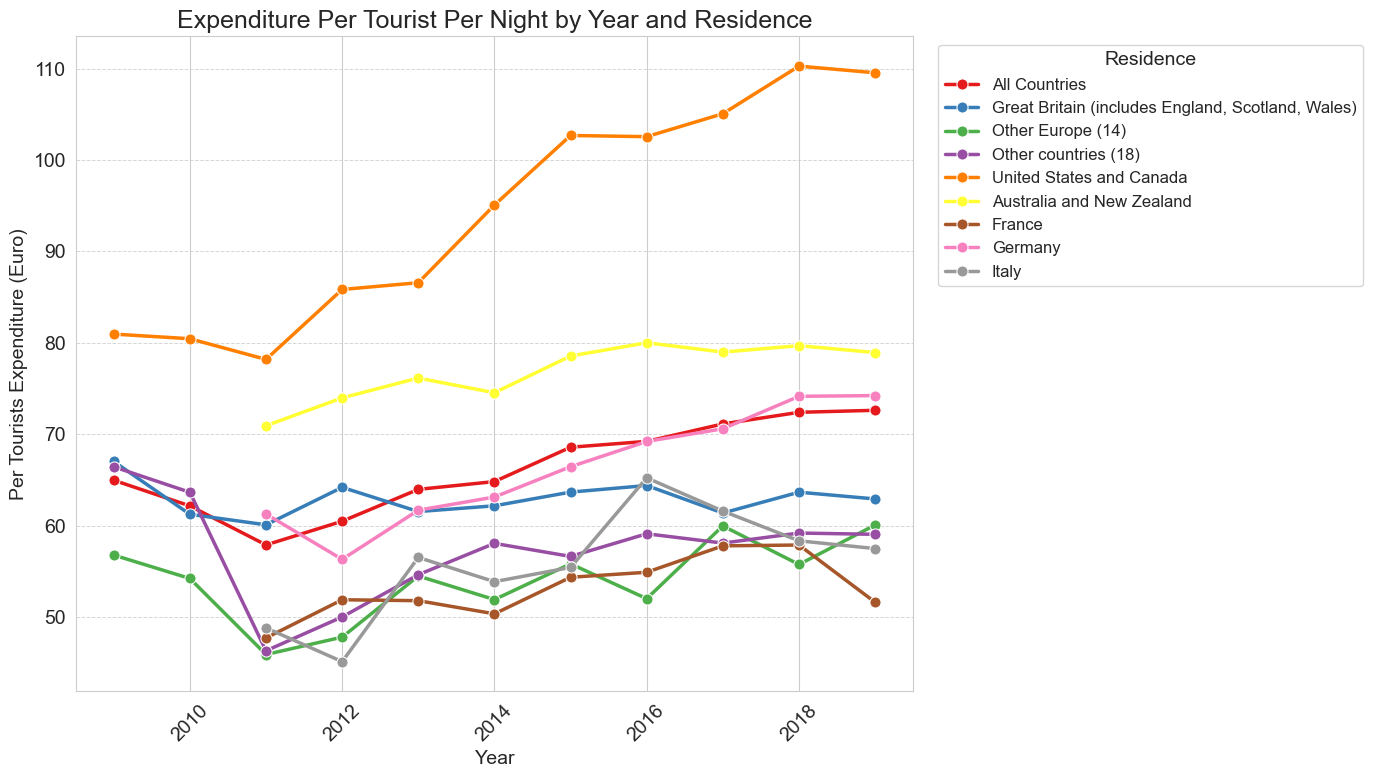

In [30]:
# Set universal plot style
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 14,'axes.titlesize': 18, 'axes.labelsize': 14, 'legend.fontsize': 12, 'lines.linewidth': 2.5,'lines.markersize': 8 })

# Set color palette
palette = sns.color_palette("Set1")

# Plot 1: Expenditure Per Tourist Per Night
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivoted_df, x='Year', y='ExpenditurePerTouristPerNight', hue='Residence', marker='o', palette=palette)
plt.title('Expenditure Per Tourist Per Night by Year and Residence')
plt.xlabel('Year')
plt.ylabel('Per Tourists Expenditure (Euro)')
plt.legend(title='Residence', bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.8)  # Clearer grid
plt.tight_layout()
plt.savefig('Expenditure_Per_Tourist_Per_Night.png', dpi=300, bbox_inches="tight"); # save as high resolution image

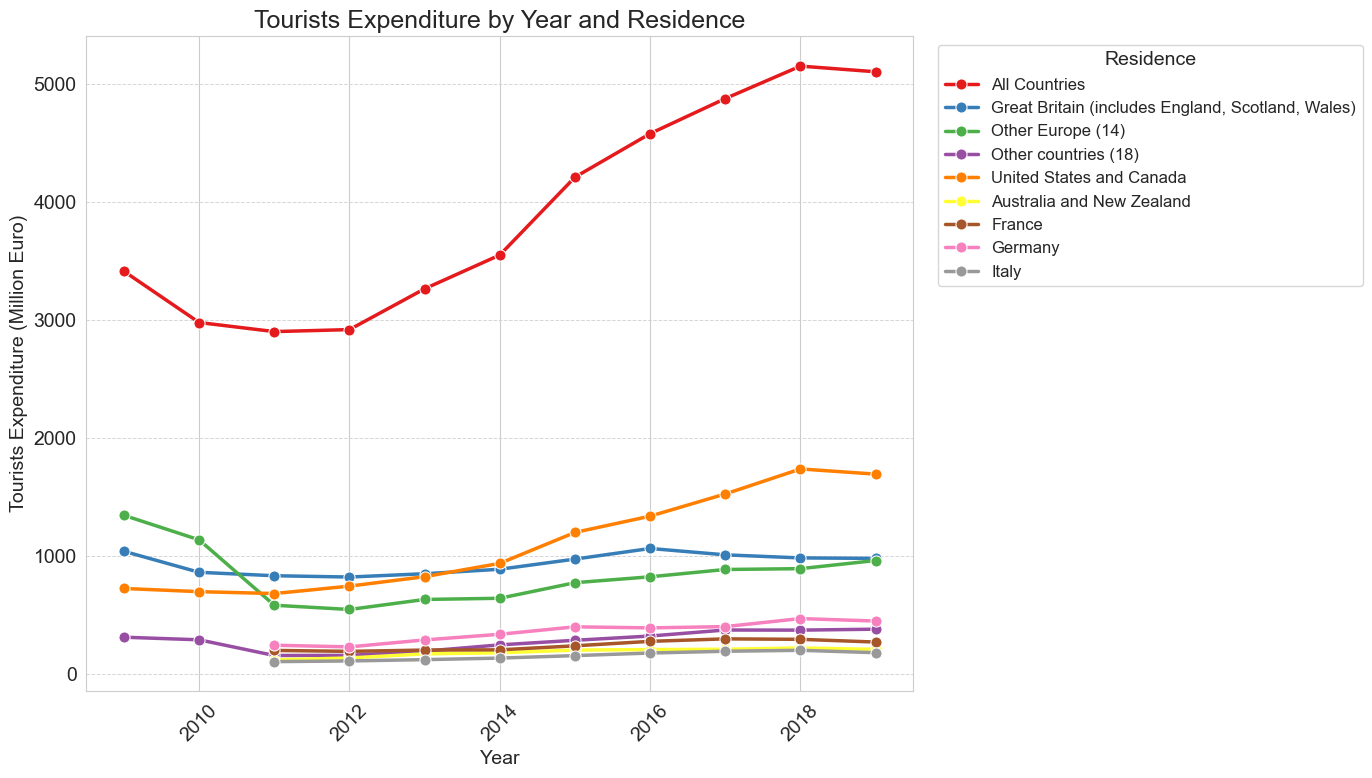

In [31]:
# Plot 2: Tourists Expenditure
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivoted_df, x='Year', y='TouristsExpenditure', hue='Residence', marker='o', palette=palette)
plt.title('Tourists Expenditure by Year and Residence')
plt.xlabel('Year')
plt.ylabel('Tourists Expenditure (Million Euro)')
plt.legend(title='Residence', bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.8)
plt.tight_layout()
plt.savefig('Tourists_Expenditure.png', dpi=300, bbox_inches="tight");

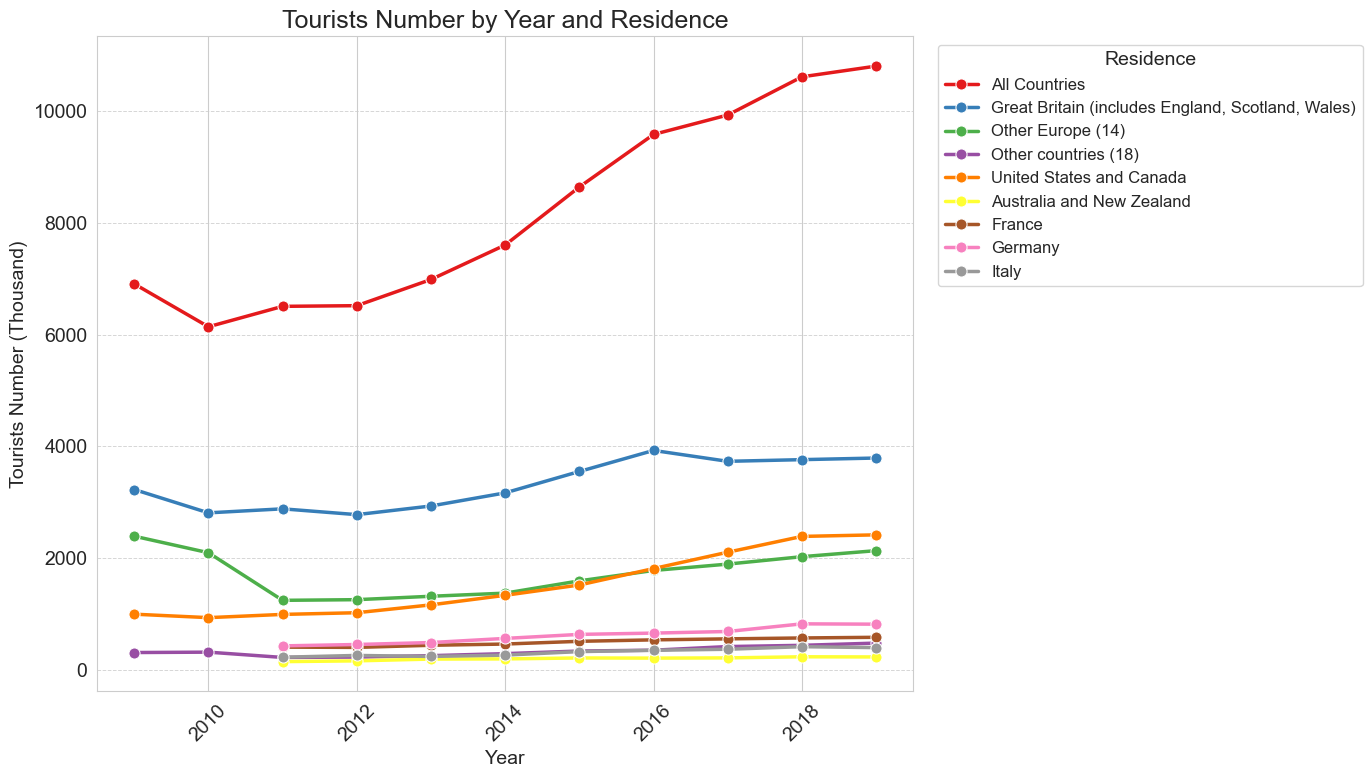

In [32]:
# Plot 3: Tourists Number
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivoted_df, x='Year', y='TouristsNumber', hue='Residence', marker='o', palette=palette)
plt.title('Tourists Number by Year and Residence')
plt.xlabel('Year')
plt.ylabel('Tourists Number (Thousand)')
plt.legend(title='Residence', bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.8)
plt.tight_layout()
plt.savefig('Tourists_Number.png', dpi=300, bbox_inches="tight");

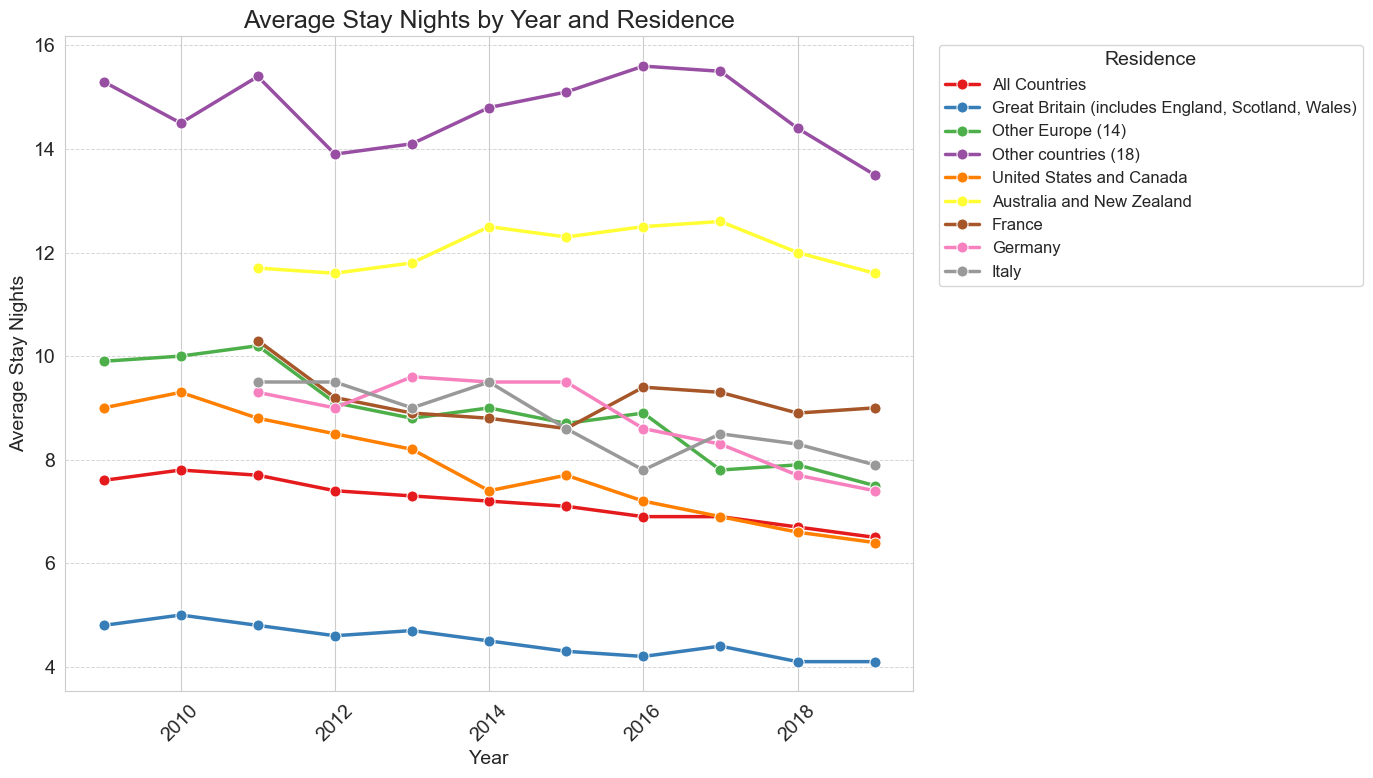

In [33]:
# Plot 4: Average Stay Nights
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivoted_df, x='Year', y='AverageStayNights', hue='Residence', marker='o', palette=palette)
plt.title('Average Stay Nights by Year and Residence')
plt.xlabel('Year')
plt.ylabel('Average Stay Nights')
plt.legend(title='Residence', bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.8)
plt.tight_layout()
plt.savefig('Average_Stay_Nights.png', dpi=300, bbox_inches="tight");

In [34]:
tourism1

,Residence,Year,TouristsToIreland,VALUE
0,All Countries,2009,TouristsNumber,6907.0
1,All Countries,2009,AverageStayNights,7.6
2,All Countries,2009,TouristsExpenditure,3410.0
3,All Countries,2010,TouristsNumber,6139.0
4,All Countries,2010,AverageStayNights,7.8
...,...,...,...,...
268,Other countries (18),2018,AverageStayNights,14.4
269,Other countries (18),2018,TouristsExpenditure,369.0
270,Other countries (18),2019,TouristsNumber,473.0
271,Other countries (18),2019,AverageStayNights,13.5


## Calculate percentages portion

In [35]:
#Pivot the dataframe
tourism_portion = tourism1.pivot_table(index=['Residence','Year'], columns=["TouristsToIreland"], values='VALUE').reset_index()

# Remove "All Countries" for portion calculation
df_filtered = tourism_portion[tourism_portion['Residence'] != 'All Countries'].copy()

# Get total per year from "All Countries"
totals = tourism_portion[tourism_portion['Residence'] == 'All Countries'][['Year', 'TouristsNumber', 'TouristsExpenditure']]

# Rename columns
totals = totals.rename(columns={'TouristsNumber': 'TotalTouristsNumber','TouristsExpenditure': 'TotalTouristsExpenditure'})

# Merge totals with filtered data
df_merged = df_filtered.merge(totals, on='Year')
df_merged.head()

TouristsToIreland,Residence,Year,AverageStayNights,TouristsExpenditure,TouristsNumber,TotalTouristsNumber,TotalTouristsExpenditure
0,Australia and New Zealand,2011,11.7,117.0,141.0,6505.0,2899.0
1,France,2011,10.3,197.0,401.0,6505.0,2899.0
2,Germany,2011,9.3,241.0,423.0,6505.0,2899.0
3,"Great Britain (includes England, Scotland, Wales)",2011,4.8,830.0,2878.0,6505.0,2899.0
4,Italy,2011,9.5,102.0,220.0,6505.0,2899.0


In [36]:
# Calculate percentages portion and round
df_merged['TouristsNumberPortion(%)'] = ((df_merged['TouristsNumber'] / df_merged['TotalTouristsNumber']) * 100).round(2)
df_merged['TouristsExpenditurePortion(%)'] = ((df_merged['TouristsExpenditure'] / df_merged['TotalTouristsExpenditure']) * 100).round(2)

df_merged[['Residence', 'Year', 'TouristsNumberPortion(%)', 'TouristsExpenditurePortion(%)']]

TouristsToIreland,Residence,Year,TouristsNumberPortion(%),TouristsExpenditurePortion(%)
0,Australia and New Zealand,2011,2.17,4.04
1,France,2011,6.16,6.80
2,Germany,2011,6.50,8.31
3,"Great Britain (includes England, Scotland, Wales)",2011,44.24,28.63
4,Italy,2011,3.38,3.52
...,...,...,...,...
75,United States and Canada,2009,14.35,21.17
76,"Great Britain (includes England, Scotland, Wales)",2010,45.71,28.86
77,Other Europe (14),2010,34.08,38.10
78,Other countries (18),2010,5.07,9.64


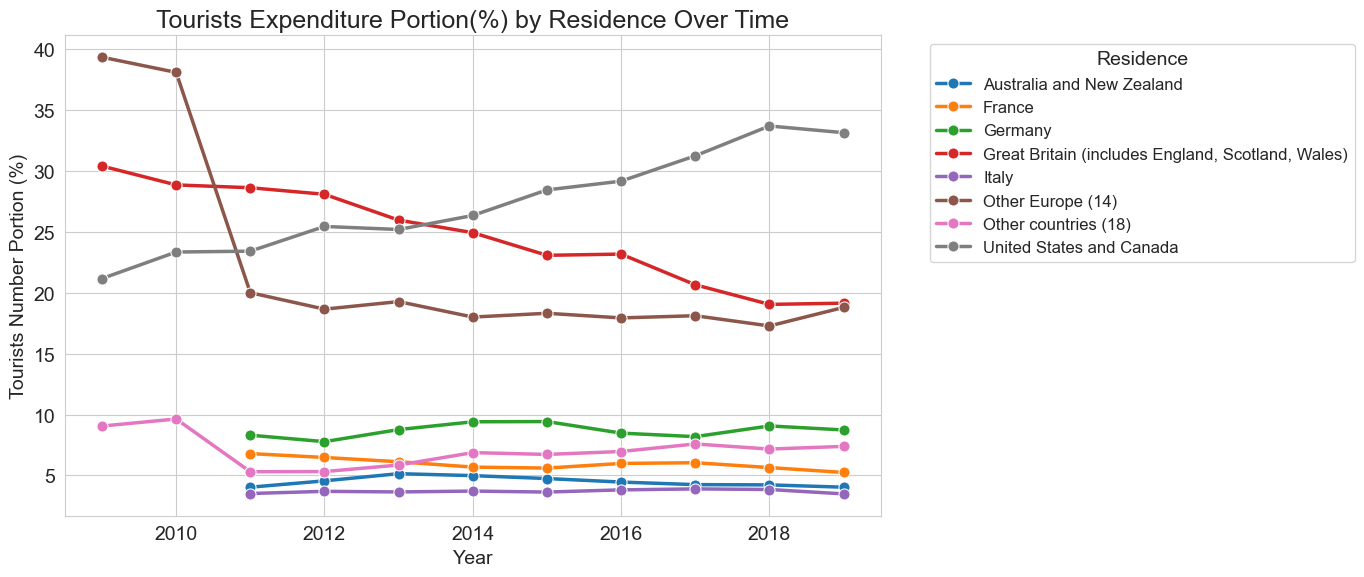

In [37]:
# plot: Tourists Expenditure Portion (%)
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_merged, x='Year', y='TouristsExpenditurePortion(%)', hue='Residence',marker='o')
plt.title('Tourists Expenditure Portion(%) by Residence Over Time')
plt.ylabel('Tourists Number Portion (%)')
plt.xlabel('Year')
plt.legend(title='Residence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('TouristsExpenditurePortion.png', dpi=300, bbox_inches="tight");

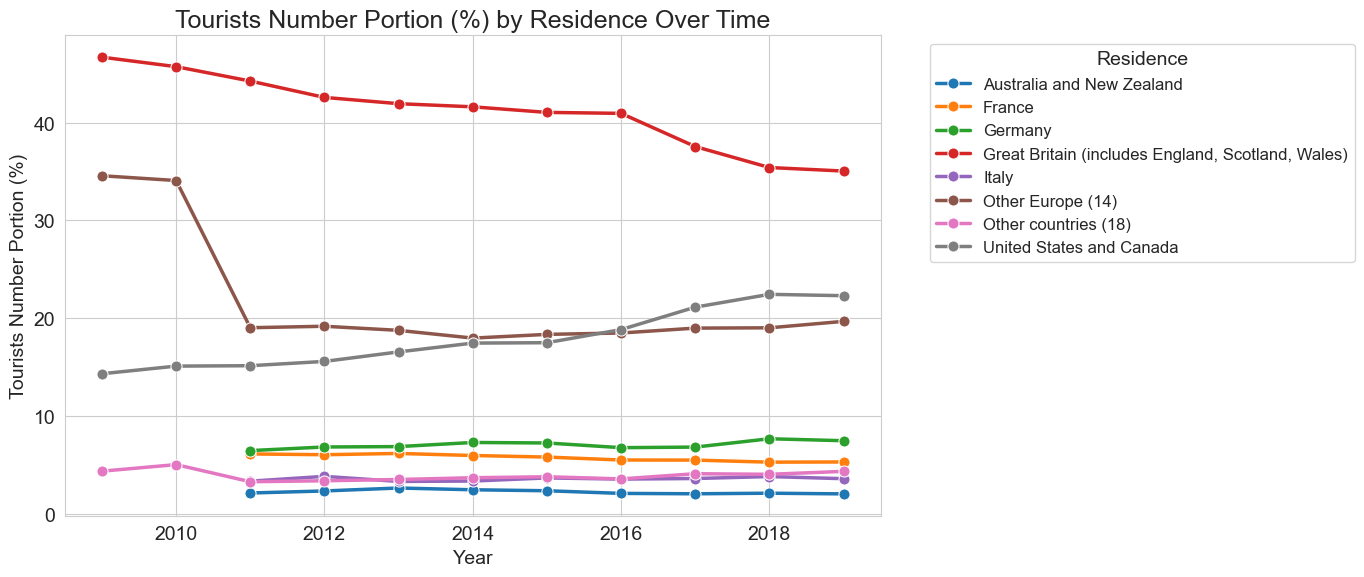

In [38]:
# plot: Tourists Number Portion(%)
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_merged, x='Year', y='TouristsNumberPortion(%)', hue='Residence',marker='o')
plt.title('Tourists Number Portion (%) by Residence Over Time')
plt.ylabel('Tourists Number Portion (%)')
plt.xlabel('Year')
plt.legend(title='Residence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('TouristsNumberPortion.png', dpi=300, bbox_inches="tight");

### <b> Data preparation on additional inbound tourism data (1983-2008) of Ireland

In [39]:
# Read csv file into a pandas dataframe
tourism_hist = pd.read_csv('TMA06_1983-2008.csv')
tourism_hist.head()

,AREARES,Area of Residence,TLIST(A1),Year,STATISTIC,Statistic Label,UNIT,VALUE
0,1,Great Britain,1983,1983,TMA06C1,Expenditure by Visitors to Ireland,Euro Million,179.0
1,1,Great Britain,1983,1983,TMA06C2,Visitors to Ireland,Thousand,1129.0
2,1,Great Britain,1983,1983,TMA06C3,Average Length of Stay in Nights by Visitors t...,Nights,8.4
3,1,Great Britain,1984,1984,TMA06C1,Expenditure by Visitors to Ireland,Euro Million,194.0
4,1,Great Britain,1984,1984,TMA06C2,Visitors to Ireland,Thousand,1188.0


In [40]:
print(tourism_hist['Area of Residence'].value_counts())

Area of Residence
Great Britain     78
Other Europe      78
USA and Canada    78
Other Areas       78
Name: count, dtype: int64


In [41]:
# Extract VALUE records related to the UK and US and Canada 1983 - 2008
tourism_hist1 = tourism_hist[tourism_hist['Area of Residence'].isin(['Great Britain', 'USA and Canada'])]
tourism_hist1

,AREARES,Area of Residence,TLIST(A1),Year,STATISTIC,Statistic Label,UNIT,VALUE
0,1,Great Britain,1983,1983,TMA06C1,Expenditure by Visitors to Ireland,Euro Million,179.0
1,1,Great Britain,1983,1983,TMA06C2,Visitors to Ireland,Thousand,1129.0
2,1,Great Britain,1983,1983,TMA06C3,Average Length of Stay in Nights by Visitors t...,Nights,8.4
3,1,Great Britain,1984,1984,TMA06C1,Expenditure by Visitors to Ireland,Euro Million,194.0
4,1,Great Britain,1984,1984,TMA06C2,Visitors to Ireland,Thousand,1188.0
...,...,...,...,...,...,...,...,...
229,3,USA and Canada,2007,2007,TMA06C2,Visitors to Ireland,Thousand,1073.0
230,3,USA and Canada,2007,2007,TMA06C3,Average Length of Stay in Nights by Visitors t...,Nights,9.1
231,3,USA and Canada,2008,2008,TMA06C1,Expenditure by Visitors to Ireland,Euro Million,660.0
232,3,USA and Canada,2008,2008,TMA06C2,Visitors to Ireland,Thousand,1005.0


In [42]:
# Remove columns
tourism_hist1.drop(['AREARES','TLIST(A1)','STATISTIC','UNIT'], axis=1, inplace=True)

# Rename columns
tourism_hist1.rename(columns={"Area of Residence": "Residence", "Statistic Label": "TouristsToIreland"}, inplace=True)

# Replace value names in column "TouristsToIreland"
tourism_hist1.replace({'TouristsToIreland' : {'Visitors to Ireland':'TouristsNumber','Average Length of Stay in Nights by Visitors to Ireland': 'AverageStayNights', 'Expenditure by Visitors to Ireland' : 'TouristsExpenditure'}} ,inplace=True)
tourism_hist1

,Residence,Year,TouristsToIreland,VALUE
0,Great Britain,1983,TouristsExpenditure,179.0
1,Great Britain,1983,TouristsNumber,1129.0
2,Great Britain,1983,AverageStayNights,8.4
3,Great Britain,1984,TouristsExpenditure,194.0
4,Great Britain,1984,TouristsNumber,1188.0
...,...,...,...,...
229,USA and Canada,2007,TouristsNumber,1073.0
230,USA and Canada,2007,AverageStayNights,9.1
231,USA and Canada,2008,TouristsExpenditure,660.0
232,USA and Canada,2008,TouristsNumber,1005.0


## Extract VALUE records related to the UK and US and Canada inbond tourism to Ireland 2009 - 2019

In [43]:
tourism_hist2 = tourism1[tourism1['Residence'].isin(['Great Britain (includes England, Scotland, Wales)', 'United States and Canada'])]
tourism_hist2

,Residence,Year,TouristsToIreland,VALUE
114,United States and Canada,2009,TouristsNumber,991.0
115,United States and Canada,2009,AverageStayNights,9.0
116,United States and Canada,2009,TouristsExpenditure,722.0
117,United States and Canada,2010,TouristsNumber,929.0
118,United States and Canada,2010,AverageStayNights,9.3
...,...,...,...,...
175,"Great Britain (includes England, Scotland, Wales)",2018,AverageStayNights,4.1
176,"Great Britain (includes England, Scotland, Wales)",2018,TouristsExpenditure,981.0
177,"Great Britain (includes England, Scotland, Wales)",2019,TouristsNumber,3788.0
178,"Great Britain (includes England, Scotland, Wales)",2019,AverageStayNights,4.1


In [44]:
# Replace value names in column "Residence"
tourism_hist2.replace({'Residence' : {'United States and Canada':'USA and Canada','Great Britain (includes England, Scotland, Wales)': 'Great Britain'}} ,inplace=True)
tourism_hist2

,Residence,Year,TouristsToIreland,VALUE
114,USA and Canada,2009,TouristsNumber,991.0
115,USA and Canada,2009,AverageStayNights,9.0
116,USA and Canada,2009,TouristsExpenditure,722.0
117,USA and Canada,2010,TouristsNumber,929.0
118,USA and Canada,2010,AverageStayNights,9.3
...,...,...,...,...
175,Great Britain,2018,AverageStayNights,4.1
176,Great Britain,2018,TouristsExpenditure,981.0
177,Great Britain,2019,TouristsNumber,3788.0
178,Great Britain,2019,AverageStayNights,4.1


## Combine the UK and US and Canada inbond tourism data ( 1983 - 2008) and data (2009 - 2019) to produce a bigger dataframes for conducting time series analysis

In [45]:
# Combine the two dataframes  1983 - 2019
tourism_uk_us_canada = pd.concat([tourism_hist1, tourism_hist2], ignore_index=True)
tourism_uk_us_canada

,Residence,Year,TouristsToIreland,VALUE
0,Great Britain,1983,TouristsExpenditure,179.0
1,Great Britain,1983,TouristsNumber,1129.0
2,Great Britain,1983,AverageStayNights,8.4
3,Great Britain,1984,TouristsExpenditure,194.0
4,Great Britain,1984,TouristsNumber,1188.0
...,...,...,...,...
217,Great Britain,2018,AverageStayNights,4.1
218,Great Britain,2018,TouristsExpenditure,981.0
219,Great Britain,2019,TouristsNumber,3788.0
220,Great Britain,2019,AverageStayNights,4.1


In [46]:
print(tourism_uk_us_canada['Residence'].value_counts())

Residence
Great Britain     111
USA and Canada    111
Name: count, dtype: int64


In [47]:
tourism_uk_us_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Residence          222 non-null    object 
 1   Year               222 non-null    int64  
 2   TouristsToIreland  222 non-null    object 
 3   VALUE              222 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.1+ KB


In [48]:
# Pivot the DataFrame
pivoted_uk_us_canada = tourism_uk_us_canada.pivot_table(index=['Year', 'Residence'], columns='TouristsToIreland', values='VALUE')
pivoted_uk_us_canada.reset_index(inplace=True)
pivoted_uk_us_canada.columns.name = None
pivoted_uk_us_canada.head()

,Year,Residence,AverageStayNights,TouristsExpenditure,TouristsNumber
0,1983,Great Britain,8.4,179.0,1129.0
1,1983,USA and Canada,10.4,131.0,292.0
2,1984,Great Britain,8.6,194.0,1188.0
3,1984,USA and Canada,10.3,166.0,324.0
4,1985,Great Britain,8.7,206.0,1104.0


In [49]:
# create a new column and calculate Expenditure Per Tourist Per Night
pivoted_uk_us_canada['ExpenditurePerTouristPerNight'] = ((pivoted_uk_us_canada['TouristsExpenditure']*1000 / pivoted_uk_us_canada['TouristsNumber']) / pivoted_uk_us_canada['AverageStayNights']).round(2)
pivoted_uk_us_canada
# 1 million = 1000 thousand

,Year,Residence,AverageStayNights,TouristsExpenditure,TouristsNumber,ExpenditurePerTouristPerNight
0,1983,Great Britain,8.4,179.0,1129.0,18.87
1,1983,USA and Canada,10.4,131.0,292.0,43.14
2,1984,Great Britain,8.6,194.0,1188.0,18.99
3,1984,USA and Canada,10.3,166.0,324.0,49.74
4,1985,Great Britain,8.7,206.0,1104.0,21.45
...,...,...,...,...,...,...
69,2017,USA and Canada,6.9,1523.0,2101.0,105.06
70,2018,Great Britain,4.1,981.0,3759.0,63.65
71,2018,USA and Canada,6.6,1735.0,2384.0,110.27
72,2019,Great Britain,4.1,977.0,3788.0,62.91


<b> ##################################################################################################################

## <b> 7. Forecasting and Evaluating Irish Inbound Tourism: Using ARIMA, SARIMA, and Theta Models
<b> See the CA3 Word report
- <b>7.1	The UK: Total Tourist Expenditure, Per Tourist Per Night Expenditure, and Tourist Numbers
- <b>7.2	The US and Canada: Total Tourist Expenditure, Per Tourist Per Night Expenditure, and Tourist Numbers
- <b>7.3	Model Evaluation and Comparison

####  <b>The UK
#### -   Total Tourists Expenditure
#### -   Per Tourist Per Night Expenditure 
#### -   Tourists Number

In [50]:
# Importing libraries
import itertools
from matplotlib import pyplot as plt
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from IPython.display import HTML as html_print
from termcolor import colored
from IPython.display import display

In [51]:
# Convert to datetime for the time series analysis
pivoted_uk_us_canada["Year"] = pd.to_datetime(pivoted_uk_us_canada["Year"], format="%Y")
pivoted_uk_us_canada.head()

,Year,Residence,AverageStayNights,TouristsExpenditure,TouristsNumber,ExpenditurePerTouristPerNight
0,1983-01-01,Great Britain,8.4,179.0,1129.0,18.87
1,1983-01-01,USA and Canada,10.4,131.0,292.0,43.14
2,1984-01-01,Great Britain,8.6,194.0,1188.0,18.99
3,1984-01-01,USA and Canada,10.3,166.0,324.0,49.74
4,1985-01-01,Great Britain,8.7,206.0,1104.0,21.45


# Forecasting the UK Tourists Expenditure

In [52]:
# Forecasting the UK Tourists Expenditure
tourism_uk_expenditure = pivoted_uk_us_canada[pivoted_uk_us_canada['Residence'] == 'Great Britain']
tourism_uk_expenditure = tourism_uk_expenditure[['Year', 'TouristsExpenditure']]
tourism_uk_expenditure.set_index('Year',inplace=True)
tourism_uk_expenditure

,TouristsExpenditure
Year,
1983-01-01,179.0
1984-01-01,194.0
1985-01-01,206.0
1986-01-01,216.0
1987-01-01,253.0
1988-01-01,317.0
1989-01-01,362.0
1990-01-01,408.0
1991-01-01,422.0


In [53]:
tourism_uk_expenditure.describe()

,TouristsExpenditure
count,37.000000
mean,801.918919
std,380.599336
min,179.000000
25%,422.000000
50%,859.000000
75%,1042.000000
max,1388.000000


## Visualize the Data

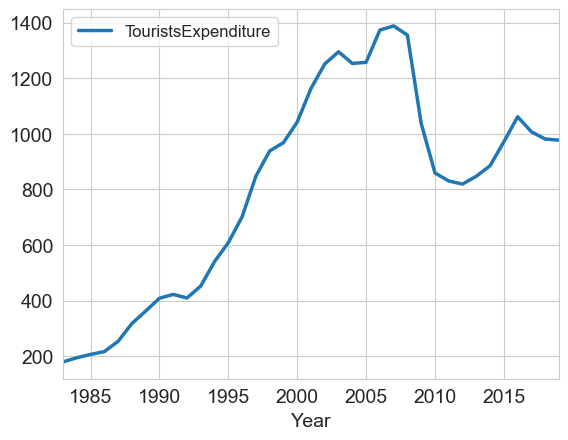

In [54]:
tourism_uk_expenditure.plot();

In [55]:
# The Augmented Dickey-Fuller (ADF) checks stationarity

In [56]:
# Ho: It is non stationary
# H1: It is stationary

def adfuller_test(expenditure):
    result = adfuller(expenditure)
    
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    for value, label in zip(result[0:4], labels):
        print(f"{label} : {value}")
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

adfuller_test(tourism_uk_expenditure['TouristsExpenditure'])

ADF Test Statistic : -1.874637303262009
p-value : 0.3440849553556661
# Lags Used : 1
Number of Observations Used : 35
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


## Differencing

In [57]:
# Differencing: Subtract the previous value from the current value to stabilize the mean >>> Make stationary

tourism_uk_expenditure['Expenditure First Difference'] = tourism_uk_expenditure['TouristsExpenditure'] - tourism_uk_expenditure['TouristsExpenditure'].shift(1)

In [58]:
tourism_uk_expenditure['TouristsExpenditure'].shift(1)

Year
1983-01-01       NaN
1984-01-01     179.0
1985-01-01     194.0
1986-01-01     206.0
1987-01-01     216.0
1988-01-01     253.0
1989-01-01     317.0
1990-01-01     362.0
1991-01-01     408.0
1992-01-01     422.0
1993-01-01     409.0
1994-01-01     452.0
1995-01-01     540.0
1996-01-01     608.0
1997-01-01     701.0
1998-01-01     847.0
1999-01-01     938.0
2000-01-01     968.0
2001-01-01    1042.0
2002-01-01    1163.0
2003-01-01    1251.0
2004-01-01    1295.0
2005-01-01    1253.0
2006-01-01    1257.0
2007-01-01    1373.0
2008-01-01    1388.0
2009-01-01    1355.0
2010-01-01    1037.0
2011-01-01     859.0
2012-01-01     830.0
2013-01-01     819.0
2014-01-01     847.0
2015-01-01     885.0
2016-01-01     971.0
2017-01-01    1061.0
2018-01-01    1007.0
2019-01-01     981.0
Name: TouristsExpenditure, dtype: float64

In [59]:
tourism_uk_expenditure['Seasonal First Difference'] = tourism_uk_expenditure['TouristsExpenditure'] - tourism_uk_expenditure['TouristsExpenditure'].shift(12)

In [60]:
tourism_uk_expenditure.head()

,TouristsExpenditure,Expenditure First Difference,Seasonal First Difference
Year,,,
1983-01-01,179.0,NaN,NaN
1984-01-01,194.0,15.0,NaN
1985-01-01,206.0,12.0,NaN
1986-01-01,216.0,10.0,NaN
1987-01-01,253.0,37.0,NaN


In [61]:
## Again test dickey fuller test
adfuller_test(tourism_uk_expenditure['Seasonal First Difference'].dropna())

ADF Test Statistic : -0.8629993429897205
p-value : 0.7999130106813793
# Lags Used : 1
Number of Observations Used : 23
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [62]:
# Differencing: Second round   d = 2
tourism_uk_expenditure['Expenditure Second Difference'] = tourism_uk_expenditure['Expenditure First Difference'] - tourism_uk_expenditure['Expenditure First Difference'].shift(1)
tourism_uk_expenditure['Seasonal Second Difference'] = tourism_uk_expenditure['Expenditure First Difference'] - tourism_uk_expenditure['Expenditure First Difference'].shift(12)

In [63]:
tourism_uk_expenditure.head()

,TouristsExpenditure,Expenditure First Difference,Seasonal First Difference,Expenditure Second Difference,Seasonal Second Difference
Year,,,,,
1983-01-01,179.0,NaN,NaN,NaN,NaN
1984-01-01,194.0,15.0,NaN,NaN,NaN
1985-01-01,206.0,12.0,NaN,-3.0,NaN
1986-01-01,216.0,10.0,NaN,-2.0,NaN
1987-01-01,253.0,37.0,NaN,27.0,NaN


In [64]:
## Again test dickey fuller test
adfuller_test(tourism_uk_expenditure['Seasonal Second Difference'].dropna())

ADF Test Statistic : -2.441959102452911
p-value : 0.13024216430080732
# Lags Used : 0
Number of Observations Used : 23
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [65]:
# Differencing: Third round   d = 3
tourism_uk_expenditure['Expenditure Third Difference'] = tourism_uk_expenditure['Expenditure Second Difference'] - tourism_uk_expenditure['Expenditure Second Difference'].shift(1)
tourism_uk_expenditure['Seasonal Third Difference'] = tourism_uk_expenditure['Expenditure Second Difference'] - tourism_uk_expenditure['Expenditure Second Difference'].shift(12)

## Again test dickey fuller test
adfuller_test(tourism_uk_expenditure['Seasonal Third Difference'].dropna())

ADF Test Statistic : -4.751680203933464
p-value : 6.722365943801077e-05
# Lags Used : 1
Number of Observations Used : 21
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.


In [66]:
tourism_uk_expenditure.head(15)

,TouristsExpenditure,Expenditure First Difference,Seasonal First Difference,Expenditure Second Difference,Seasonal Second Difference,Expenditure Third Difference,Seasonal Third Difference
Year,,,,,,,
1983-01-01,179.0,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-01,194.0,15.0,NaN,NaN,NaN,NaN,NaN
1985-01-01,206.0,12.0,NaN,-3.0,NaN,NaN,NaN
1986-01-01,216.0,10.0,NaN,-2.0,NaN,1.0,NaN
1987-01-01,253.0,37.0,NaN,27.0,NaN,29.0,NaN
1988-01-01,317.0,64.0,NaN,27.0,NaN,0.0,NaN
1989-01-01,362.0,45.0,NaN,-19.0,NaN,-46.0,NaN
1990-01-01,408.0,46.0,NaN,1.0,NaN,20.0,NaN
1991-01-01,422.0,14.0,NaN,-32.0,NaN,-33.0,NaN


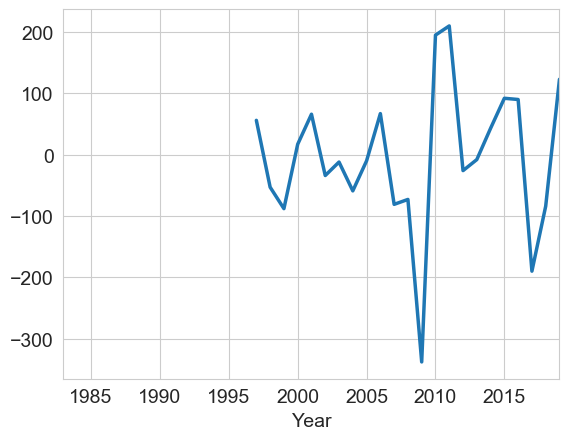

In [67]:
tourism_uk_expenditure['Seasonal Third Difference'].plot();

## Auto Regressive Model

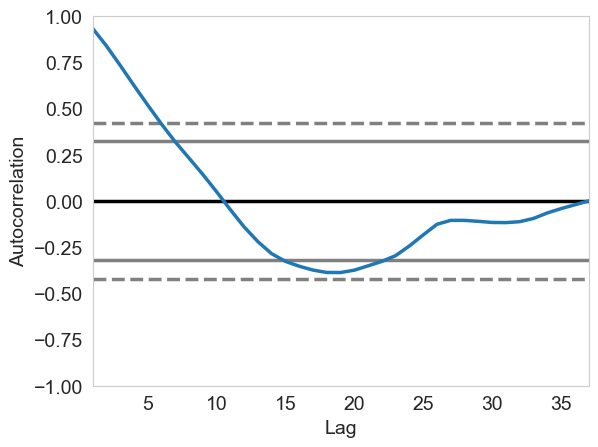

In [68]:
from pandas.plotting import autocorrelation_plot, scatter_matrix
autocorrelation_plot(tourism_uk_expenditure['TouristsExpenditure'])
plt.show()

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

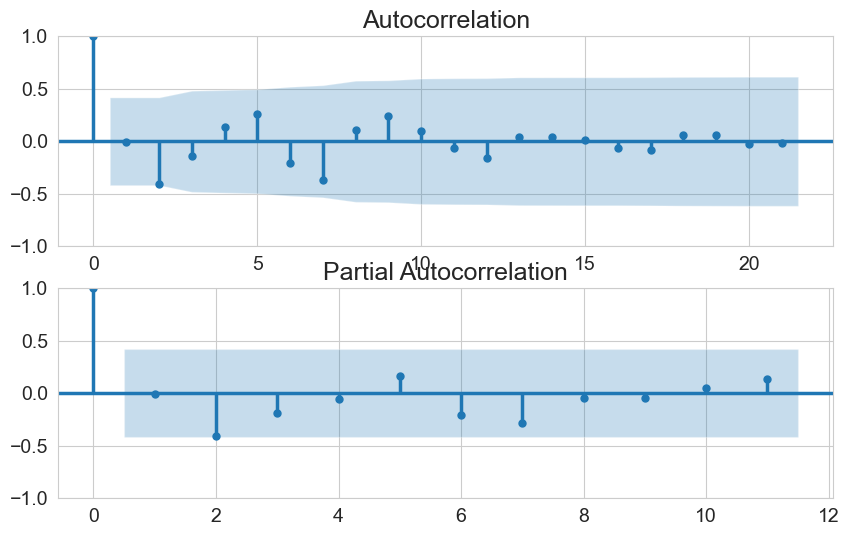

In [70]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tourism_uk_expenditure['Seasonal Third Difference'].iloc[15:],lags=21,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tourism_uk_expenditure['Seasonal Third Difference'].iloc[15:],lags=11,ax=ax2)
plt.savefig('UK Tourists Expenditure Acf Pcf.png', dpi=300, bbox_inches="tight");

In [71]:
# the ACF and PACF plots indicates that:
# d = 3 (to make it stationary)
# q = 0 (from autocorrelation)
# p = 0 (from partial autocorrelation )
# seasonality = 12

##  ARIMA

In [72]:
# For non-seasonal data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [73]:
# (p, d, q)
model=ARIMA(tourism_uk_expenditure['TouristsExpenditure'],order=(0,3,0))
model_fit=model.fit()
model_fit.summary()

C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     TouristsExpenditure   No. Observations:                   37
Model:                  ARIMA(0, 3, 0)   Log Likelihood                -208.801
Date:                 Tue, 27 May 2025   AIC                            419.601
Time:                         08:02:20   BIC                            421.128
Sample:                     01-01-1983   HQIC                           420.122
                          - 01-01-2019                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.263e+04   1711.489      7.381      0.000    9277.814     1.6e+04
===================================================================================
Ljung-Box (L1) (Q):                   5.38   Jarque-Bera (JB):                34.37
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              17.50   Skew:                             1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

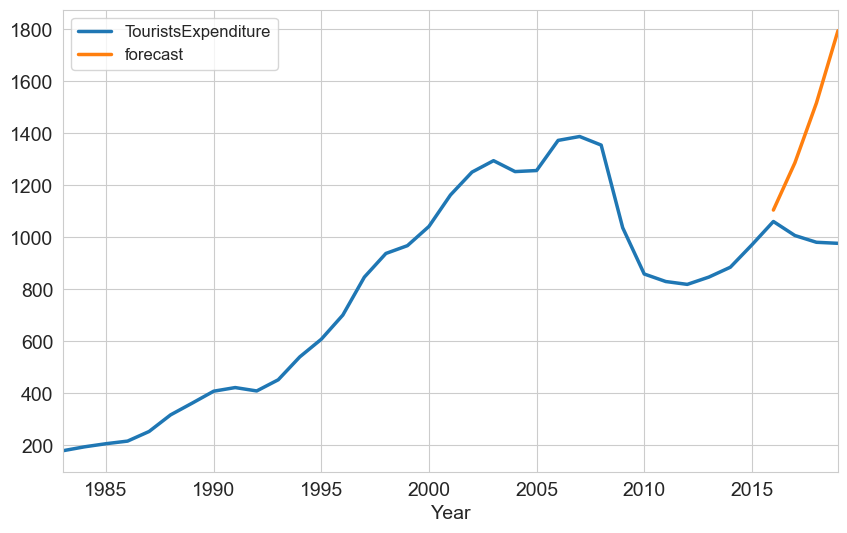

In [74]:
tourism_uk_expenditure['forecast']=model_fit.predict(start='2016-01-01', end='2019-01-01',dynamic=True)
tourism_uk_expenditure[['TouristsExpenditure','forecast']].plot(figsize=(10,6));

## SARIMA

In [75]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(tourism_uk_expenditure['TouristsExpenditure'],order=(1,1, 0),seasonal_order=(1,1,0,12))
results=model.fit()

C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


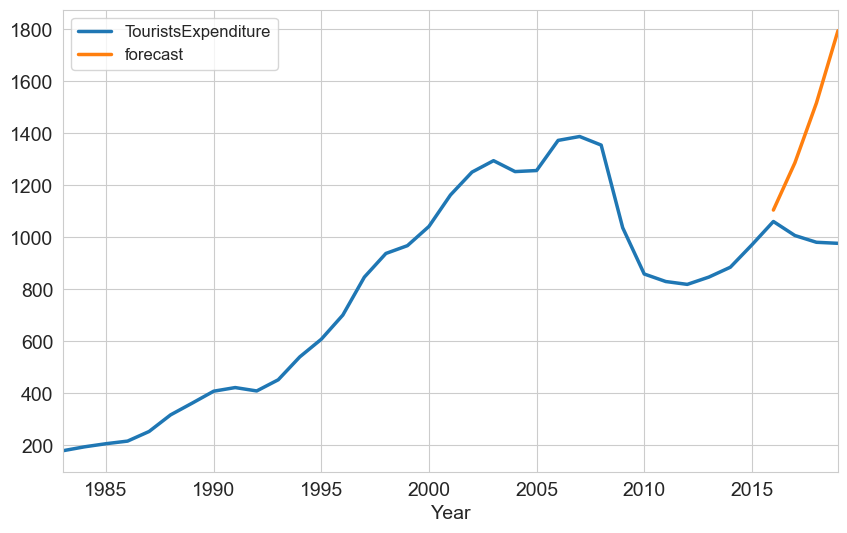

In [76]:
tourism_uk_expenditure['forecast']=model_fit.predict(start='2016-01-01', end='2019-01-01',dynamic=True)
tourism_uk_expenditure[['TouristsExpenditure','forecast']].plot(figsize=(10,6));

In [77]:
from pandas.tseries.offsets import DateOffset

# Generate 10 future yearly dates
future_dates = [tourism_uk_expenditure.index[-1] + DateOffset(years=x) for x in range(1, 11)]
future_dates

[Timestamp('2020-01-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2024-01-01 00:00:00'),
 Timestamp('2025-01-01 00:00:00'),
 Timestamp('2026-01-01 00:00:00'),
 Timestamp('2027-01-01 00:00:00'),
 Timestamp('2028-01-01 00:00:00'),
 Timestamp('2029-01-01 00:00:00')]

In [78]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=tourism_uk_expenditure.columns)
future_df=pd.concat([tourism_uk_expenditure,future_datest_df])
future_df.tail()

,TouristsExpenditure,Expenditure First Difference,Seasonal First Difference,Expenditure Second Difference,Seasonal Second Difference,Expenditure Third Difference,Seasonal Third Difference,forecast
2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2027-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2029-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MAPE (2010–2019): 10.48%


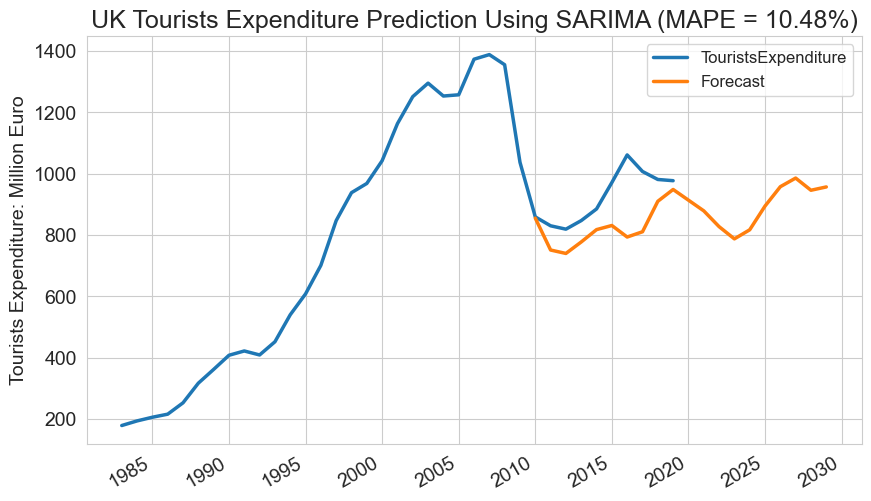

In [79]:
## mean_absolute_percentage_error (MAPE) errors are comparabel among diffirent models.
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

# forecast
future_df['Forecast'] = results.predict(start = '2010-01-01', end = '2029-01-01', dynamic= True)
future_df[['TouristsExpenditure', 'Forecast']].plot(figsize=(10, 6))
plt.ylabel("Tourists Expenditure: Million Euro")
plt.title("UK Tourists Expenditure Prediction Using SARIMA (MAPE = 10.48%)")
plt.savefig('UK Tourists Expenditure Forecast SARIMA.png', dpi=300, bbox_inches="tight")

# MAPE (mean_absolute_percentage_error errors) are comparabel among diffirent models.
mape_df = future_df[(future_df.index >= '2010-01-01') & (future_df.index <= '2019-12-31')]
mape = mean_absolute_percentage_error(mape_df['TouristsExpenditure'], mape_df['Forecast'])
print(f"MAPE (2010–2019): {mape:.2%}")

## Grid search over AIC value to optimize the model accuracy

In [80]:
5**5

3125

In [81]:
aicVals1 = []
for p in range(5):
    for q in range(5):
                    aicVals1.append((SARIMAX(tourism_uk_expenditure['TouristsExpenditure'], order=(p, 3, q), seasonal_order=(0, 0, 0, 12), initialization='approximate_diffuse').fit(maxiter=300).aic, p, q))

C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\t

In [82]:
aicVals1.sort()
aicVals1[:5]
                 # (AIC score, p, q)

[(449.4751194534412, 0, 1),
 (451.4480169796756, 1, 1),
 (452.39234182291574, 2, 1),
 (452.84718289511585, 0, 2),
 (454.8055637686483, 1, 2)]

In [83]:
model2 = SARIMAX(tourism_uk_expenditure["TouristsExpenditure"], order=(0, 3, 1), seasonal_order=(0, 3, 1, 12), initialization='approximate_diffuse').fit(maxiter=300)
model2.summary()

C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                TouristsExpenditure   No. Observations:                   37
Model:             SARIMAX(0, 3, 1)x(0, 3, 1, 12)   Log Likelihood                -304.264
Date:                            Tue, 27 May 2025   AIC                            614.529
Time:                                    08:02:34   BIC                            619.362
Sample:                                01-01-1983   HQIC                           616.233
                                     - 01-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1               0   1.49e+06          0      1.000   -2.92e+06    2.92e+06
ma.S.L12            0   1.78e+06          0      1.000   -3.49e+06    3.49e+06
sigma2         1.0000   1.36e+06   7.34e-07      1.000   -2.67e+06    2.67e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.13   Jarque-Bera (JB):                65.83
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):              67.90   Skew:                             1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

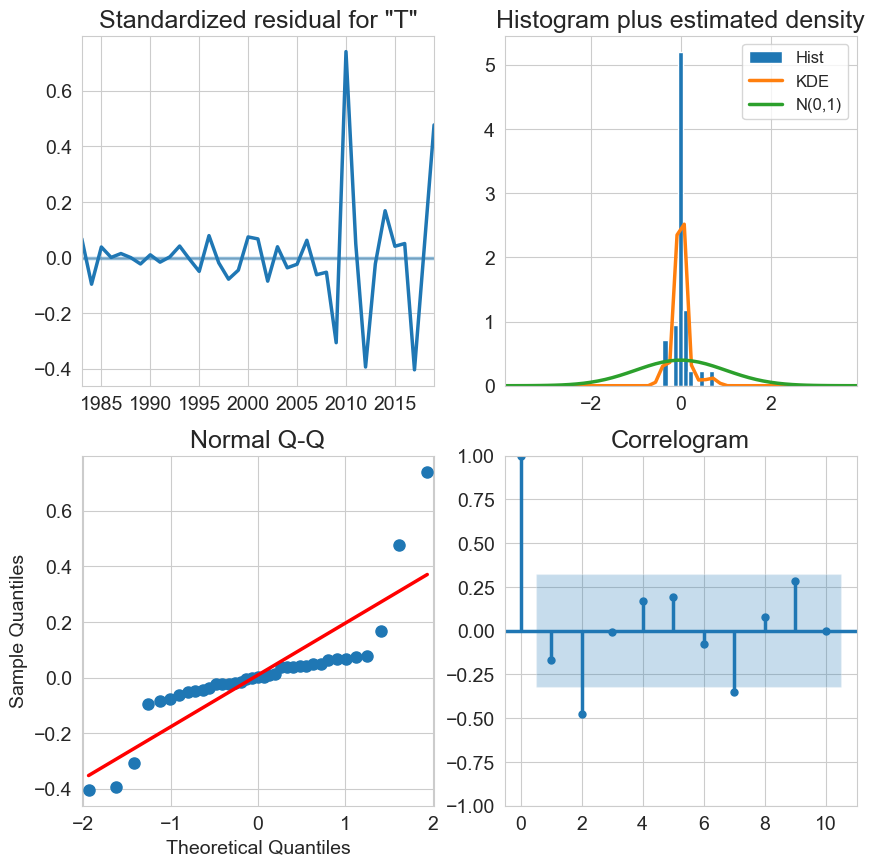

In [84]:
model2.plot_diagnostics(figsize=(10,10));

In [85]:
train = tourism_uk_expenditure.loc["1983":"2011"]
test = tourism_uk_expenditure.loc["2012":"2019"]

# Forecast for the test period (8 years) ---
forecast = model2.get_forecast(steps=8)
predicted = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# MAPE
actual = test["TouristsExpenditure"]
mape = mean_absolute_percentage_error(actual, predicted)
print(f"MAPE (2012–2019): {mape:.2%}")

MAPE (2012–2019): 257.96%


# Theta Forecaster

In [86]:
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.base import ForecastingHorizon

MAPE (2010–2019): 4.87%


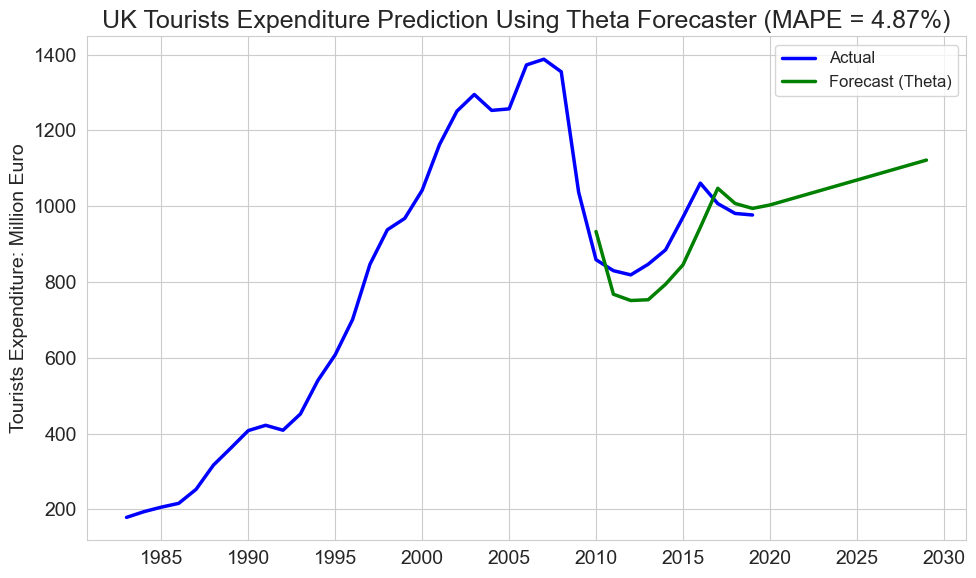

In [87]:
# Ensure index is in correct format
if not isinstance(tourism_uk_expenditure.index, pd.PeriodIndex):
    tourism_uk_expenditure.index = pd.to_datetime(tourism_uk_expenditure.index)
    tourism_uk_expenditure.index = tourism_uk_expenditure.index.to_period('Y')

# Train-test split and model fit
train_series = tourism_uk_expenditure.loc[:'2019', 'TouristsExpenditure']
model = ThetaForecaster(sp=1)  # sp=1 for yearly seasonality
model.fit(train_series)

# Forecast
forecast_years = pd.period_range(start='2010', end='2029', freq='Y')
fh = ForecastingHorizon(forecast_years, is_relative=False)
forecast = model.predict(fh)

# Plot
forecast_df = forecast.to_frame(name='Forecast')
forecast_df.index = forecast_df.index.to_timestamp()
actual_df = tourism_uk_expenditure.copy()
actual_df.index = actual_df.index.to_timestamp()
combined_df = actual_df.join(forecast_df, how='outer')
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['TouristsExpenditure'], label='Actual', color='blue')
plt.plot(combined_df.index, combined_df['Forecast'], label='Forecast (Theta)', color='green')
plt.ylabel("Tourists Expenditure: Million Euro")
plt.title("UK Tourists Expenditure Prediction Using Theta Forecaster (MAPE = 4.87%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("UK Tourists Expenditure Forecast Theta.png", dpi=300, bbox_inches="tight")

# MAPE
mape_df = combined_df.loc['2010':'2019'].dropna()
mape = mean_absolute_percentage_error(mape_df['TouristsExpenditure'], mape_df['Forecast'])
print(f"MAPE (2010–2019): {mape:.2%}")

# Forecasting the UK Per Tourist Per Night Tourists Expenditure

In [88]:
pivoted_uk_us_canada.head(2)

,Year,Residence,AverageStayNights,TouristsExpenditure,TouristsNumber,ExpenditurePerTouristPerNight
0,1983-01-01,Great Britain,8.4,179.0,1129.0,18.87
1,1983-01-01,USA and Canada,10.4,131.0,292.0,43.14


In [89]:
# Forecasting the UK Per Tourist Per Night Tourists Expenditure
uk_PerTouristPerNight  = pivoted_uk_us_canada[pivoted_uk_us_canada['Residence'] == 'Great Britain']
uk_PerTouristPerNight = uk_PerTouristPerNight[['Year', 'ExpenditurePerTouristPerNight']]
uk_PerTouristPerNight.set_index('Year',inplace=True)
uk_PerTouristPerNight

,ExpenditurePerTouristPerNight
Year,
1983-01-01,18.87
1984-01-01,18.99
1985-01-01,21.45
1986-01-01,23.72
1987-01-01,26.16
1988-01-01,28.85
1989-01-01,28.56
1990-01-01,30.06
1991-01-01,30.90


In [90]:
uk_PerTouristPerNight.describe()

,ExpenditurePerTouristPerNight
count,37.000000
mean,49.372973
std,17.915421
min,18.870000
25%,30.900000
50%,59.990000
75%,64.180000
max,73.240000


## Visualize the Data

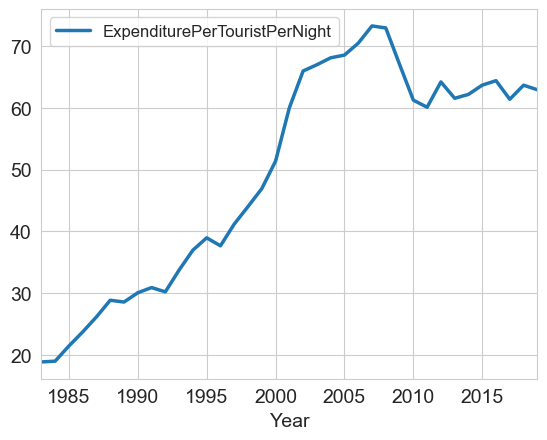

In [91]:
uk_PerTouristPerNight.plot();

In [92]:
# The Augmented Dickey-Fuller (ADF) checks stationarity
# Ho: It is non stationary
# H1: It is stationary

def adfuller_test(expenditure):
    result = adfuller(expenditure)
    
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    for value, label in zip(result[0:4], labels):
        print(f"{label} : {value}")
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

adfuller_test(uk_PerTouristPerNight['ExpenditurePerTouristPerNight'])

ADF Test Statistic : -1.798912008152239
p-value : 0.38100198499722404
# Lags Used : 1
Number of Observations Used : 35
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


## Differencing

In [93]:
uk_PerTouristPerNight['PerTouristPerNight First Difference'] = uk_PerTouristPerNight['ExpenditurePerTouristPerNight'] - uk_PerTouristPerNight['ExpenditurePerTouristPerNight'].shift(1)
uk_PerTouristPerNight['Seasonal First Difference'] = uk_PerTouristPerNight['ExpenditurePerTouristPerNight'] - uk_PerTouristPerNight['ExpenditurePerTouristPerNight'].shift(12)
## Again test dickey fuller test
adfuller_test(uk_PerTouristPerNight['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.331308124963819
p-value : 0.6147299084068473
# Lags Used : 6
Number of Observations Used : 18
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [94]:
# Differencing: Second round   d = 2
uk_PerTouristPerNight['PerTouristPerNight Second Difference'] = uk_PerTouristPerNight['PerTouristPerNight First Difference'] - uk_PerTouristPerNight['PerTouristPerNight First Difference'].shift(1)
uk_PerTouristPerNight['Seasonal Second Difference'] = uk_PerTouristPerNight['PerTouristPerNight First Difference'] - uk_PerTouristPerNight['PerTouristPerNight First Difference'].shift(12)
## Again test dickey fuller test
adfuller_test(uk_PerTouristPerNight['Seasonal Second Difference'].dropna())

ADF Test Statistic : -2.8636152539145137
p-value : 0.04974559841174226
# Lags Used : 0
Number of Observations Used : 23
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.


In [95]:
uk_PerTouristPerNight.head(14)

,ExpenditurePerTouristPerNight,PerTouristPerNight First Difference,Seasonal First Difference,PerTouristPerNight Second Difference,Seasonal Second Difference
Year,,,,,
1983-01-01,18.87,NaN,NaN,NaN,NaN
1984-01-01,18.99,0.12,NaN,NaN,NaN
1985-01-01,21.45,2.46,NaN,2.34,NaN
1986-01-01,23.72,2.27,NaN,-0.19,NaN
1987-01-01,26.16,2.44,NaN,0.17,NaN
1988-01-01,28.85,2.69,NaN,0.25,NaN
1989-01-01,28.56,-0.29,NaN,-2.98,NaN
1990-01-01,30.06,1.50,NaN,1.79,NaN
1991-01-01,30.90,0.84,NaN,-0.66,NaN


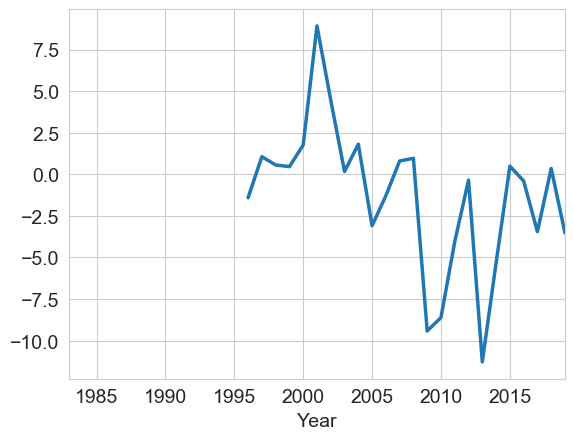

In [96]:
uk_PerTouristPerNight['Seasonal Second Difference'].plot();

## Auto Regressive Model

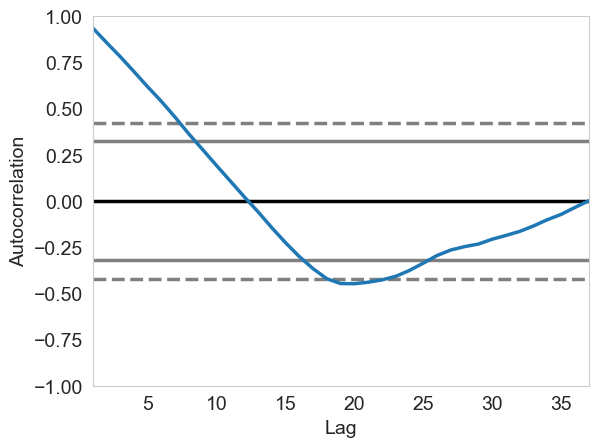

In [97]:
autocorrelation_plot(uk_PerTouristPerNight['ExpenditurePerTouristPerNight']);

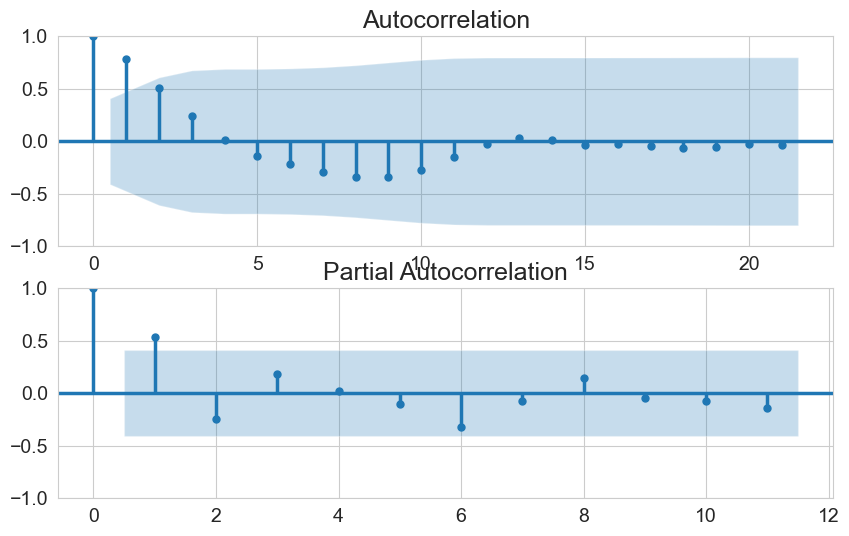

In [98]:
# ACF and PACF
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(uk_PerTouristPerNight['ExpenditurePerTouristPerNight'].iloc[14:],lags=21,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tourism_uk_expenditure['Seasonal Second Difference'].iloc[14:],lags=11,ax=ax2)
plt.savefig('UK PerTouristPerNight Acf Pcf.png', dpi=300, bbox_inches="tight");

In [99]:
# the ACF and PACF plots indicates that:
# d = 2 (to make it stationary)
# q = 1 (from autocorrelation)
# p = 1 (from partial autocorrelation )
# seasonality = 12

##  ARIMA

In [100]:
# (p, d, q)
model=ARIMA(uk_PerTouristPerNight['ExpenditurePerTouristPerNight'],order=(1,2,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     ExpenditurePerTouristPerNight   No. Observations:                   37
Model:                            ARIMA(1, 2, 1)   Log Likelihood                 -84.319
Date:                           Tue, 27 May 2025   AIC                            174.637
Time:                                   08:02:42   BIC                            179.303
Sample:                               01-01-1983   HQIC                           176.248
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4279      0.170      2.519      0.012       0.095       0.761
ma.L1         -0.9457      0.134     -7.040      0.000      -1.209      -0.682
sigma2         6.9616      1.679      4.147      0.000       3.671      10.252
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.90   Prob(JB):                         0.72
Heteroskedasticity (H):               4.23   Skew:                            -0.33
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

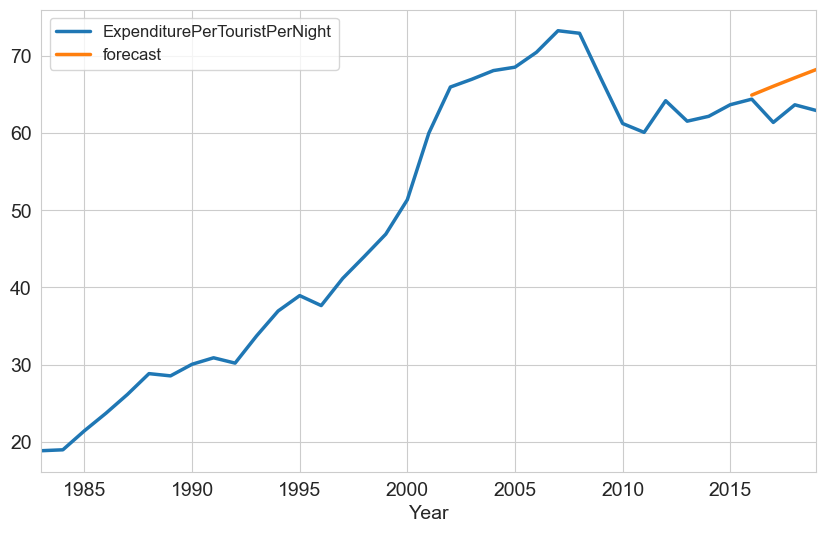

In [101]:
uk_PerTouristPerNight['forecast']=model_fit.predict(start='2016-01-01', end='2019-01-01',dynamic=True)
uk_PerTouristPerNight[['ExpenditurePerTouristPerNight','forecast']].plot(figsize=(10,6));

## SARIMA

C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


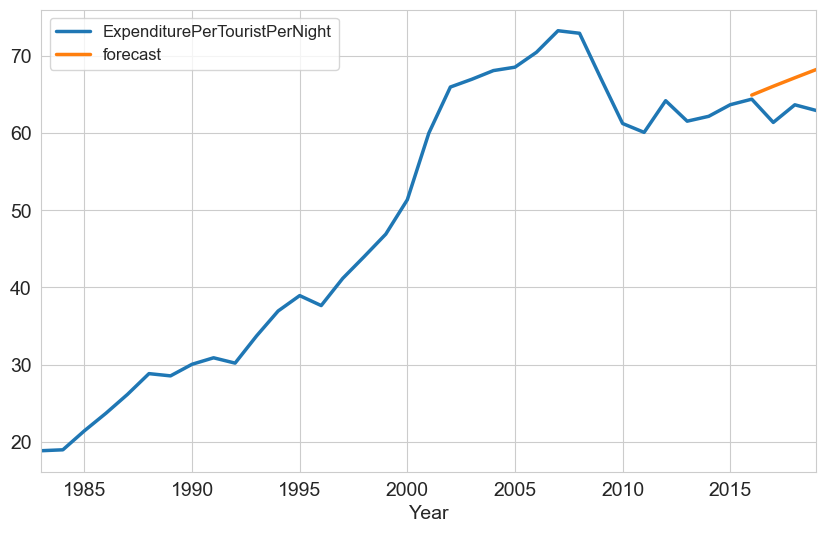

In [102]:
model=sm.tsa.statespace.SARIMAX(uk_PerTouristPerNight['ExpenditurePerTouristPerNight'],order=(1,1, 0),seasonal_order=(1,1,0,12))
results=model.fit()
uk_PerTouristPerNight['forecast']=model_fit.predict(start='2016-01-01', end='2019-01-01',dynamic=True)
uk_PerTouristPerNight[['ExpenditurePerTouristPerNight','forecast']].plot(figsize=(10,6));

In [103]:
# Generate 10 future yearly dates
future_dates = [uk_PerTouristPerNight.index[-1] + DateOffset(years=x) for x in range(1, 11)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=uk_PerTouristPerNight.columns)
future_df=pd.concat([uk_PerTouristPerNight,future_datest_df])

MAPE (2010–2019): 19.18%


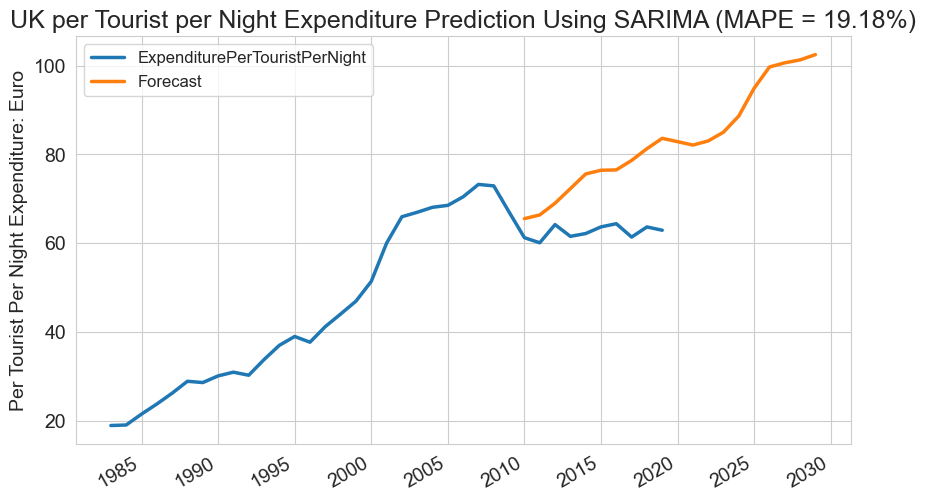

In [104]:
## mean_absolute_percentage_error (MAPE) errors are comparabel among diffirent models.
# forecast
future_df['Forecast'] = results.predict(start = '2010-01-01', end = '2029-01-01', dynamic= True)
future_df[['ExpenditurePerTouristPerNight', 'Forecast']].plot(figsize=(10, 6))
plt.ylabel("Per Tourist Per Night Expenditure: Euro")
plt.title("UK per Tourist per Night Expenditure Prediction Using SARIMA (MAPE = 19.18%)")
plt.savefig('UK perTouristperNight Expenditure Forecast SARIMA.png', dpi=300, bbox_inches="tight")

mape_df = future_df[(future_df.index >= '2010-01-01') & (future_df.index <= '2019-12-31')]
mape = mean_absolute_percentage_error(mape_df['ExpenditurePerTouristPerNight'], mape_df['Forecast'])
print(f"MAPE (2010–2019): {mape:.2%}")

## Theta Forecaster

MAPE (2010–2019): 3.26%


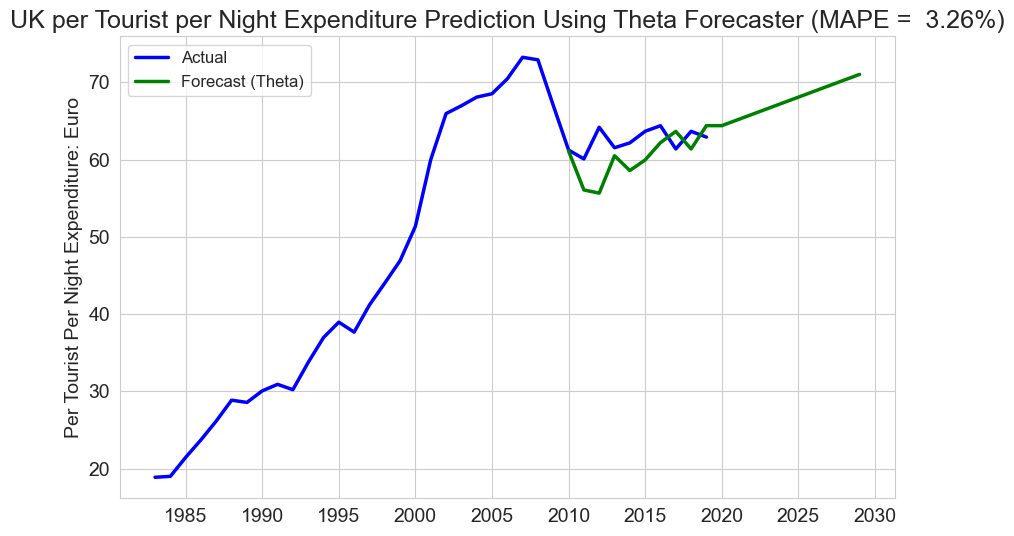

In [105]:
# Ensure index is in correct format
if not isinstance(uk_PerTouristPerNight.index, pd.PeriodIndex):
    uk_PerTouristPerNight.index = pd.to_datetime(uk_PerTouristPerNight.index)
    uk_PerTouristPerNight.index = uk_PerTouristPerNight.index.to_period('Y')

# Train-test split and model fit
train_series = uk_PerTouristPerNight.loc[:'2019', 'ExpenditurePerTouristPerNight']
model = ThetaForecaster(sp=1)  # sp=1 for yearly seasonality
model.fit(train_series)

# Forecast
forecast_years = pd.period_range(start='2010', end='2029', freq='Y')
fh = ForecastingHorizon(forecast_years, is_relative=False)
forecast = model.predict(fh)

# Plot
forecast_df = forecast.to_frame(name='Forecast')
forecast_df.index = forecast_df.index.to_timestamp()
actual_df = uk_PerTouristPerNight.copy()
actual_df.index = actual_df.index.to_timestamp()
combined_df = actual_df.join(forecast_df, how='outer')
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['ExpenditurePerTouristPerNight'], label='Actual', color='blue')
plt.plot(combined_df.index, combined_df['Forecast'], label='Forecast (Theta)', color='green')

plt.ylabel("Per Tourist Per Night Expenditure: Euro")
plt.title("UK per Tourist per Night Expenditure Prediction Using Theta Forecaster (MAPE =  3.26%)")
plt.legend()
plt.savefig('UK perTouristperNight Expenditure Forecast Theta.png', dpi=300, bbox_inches="tight")

# MAPE
mape_df = combined_df.loc['2010':'2019'].dropna()
mape = mean_absolute_percentage_error(mape_df['ExpenditurePerTouristPerNight'], mape_df['Forecast'])
print(f"MAPE (2010–2019): {mape:.2%}")

# Forecasting the UK Tourists Number

In [106]:
pivoted_uk_us_canada.head(2)

,Year,Residence,AverageStayNights,TouristsExpenditure,TouristsNumber,ExpenditurePerTouristPerNight
0,1983-01-01,Great Britain,8.4,179.0,1129.0,18.87
1,1983-01-01,USA and Canada,10.4,131.0,292.0,43.14


In [107]:
# Forecasting the UK Tourists Number
uk_TouristsNumber  = pivoted_uk_us_canada[pivoted_uk_us_canada['Residence'] == 'Great Britain']
uk_TouristsNumber = uk_TouristsNumber[['Year', 'TouristsNumber']]
uk_TouristsNumber.set_index('Year',inplace=True)
uk_TouristsNumber

,TouristsNumber
Year,
1983-01-01,1129.0
1984-01-01,1188.0
1985-01-01,1104.0
1986-01-01,1084.0
1987-01-01,1209.0
1988-01-01,1465.0
1989-01-01,1668.0
1990-01-01,1786.0
1991-01-01,1729.0


In [108]:
uk_TouristsNumber.describe()

,TouristsNumber
count,37.000000
mean,2795.432432
std,1000.424925
min,1084.000000
25%,1786.000000
50%,3025.000000
75%,3681.000000
max,4060.000000


## Visualize the Data

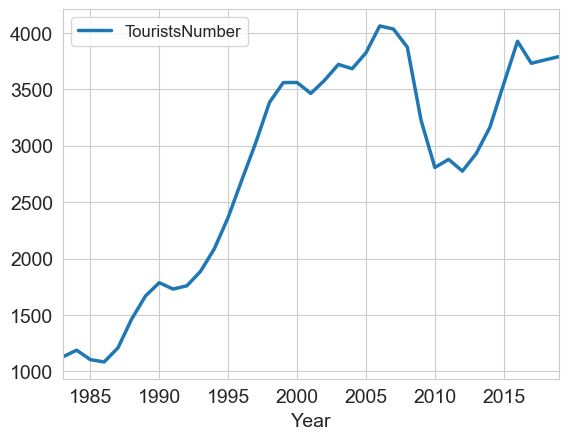

In [109]:
uk_TouristsNumber.plot();

In [110]:
# The Augmented Dickey-Fuller (ADF) checks stationarity
# Ho: It is non stationary
# H1: It is stationary

def adfuller_test(expenditure):
    result = adfuller(expenditure)
    
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    for value, label in zip(result[0:4], labels):
        print(f"{label} : {value}")
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

adfuller_test(uk_TouristsNumber['TouristsNumber'])

ADF Test Statistic : -1.6616735083363323
p-value : 0.45095968494677374
# Lags Used : 7
Number of Observations Used : 29
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


## Differencing

In [111]:
uk_TouristsNumber['TouristsNumber First Difference'] = uk_TouristsNumber['TouristsNumber'] - uk_TouristsNumber['TouristsNumber'].shift(1)
uk_TouristsNumber['Seasonal First Difference'] = uk_TouristsNumber['TouristsNumber'] - uk_TouristsNumber['TouristsNumber'].shift(12)
## Again test dickey fuller test
adfuller_test(uk_TouristsNumber['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.92747480243046
p-value : 3.082494425246475e-05
# Lags Used : 9
Number of Observations Used : 15
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.


In [112]:
uk_TouristsNumber.head(13)

,TouristsNumber,TouristsNumber First Difference,Seasonal First Difference
Year,,,
1983-01-01,1129.0,NaN,NaN
1984-01-01,1188.0,59.0,NaN
1985-01-01,1104.0,-84.0,NaN
1986-01-01,1084.0,-20.0,NaN
1987-01-01,1209.0,125.0,NaN
1988-01-01,1465.0,256.0,NaN
1989-01-01,1668.0,203.0,NaN
1990-01-01,1786.0,118.0,NaN
1991-01-01,1729.0,-57.0,NaN


## Auto Regressive Model

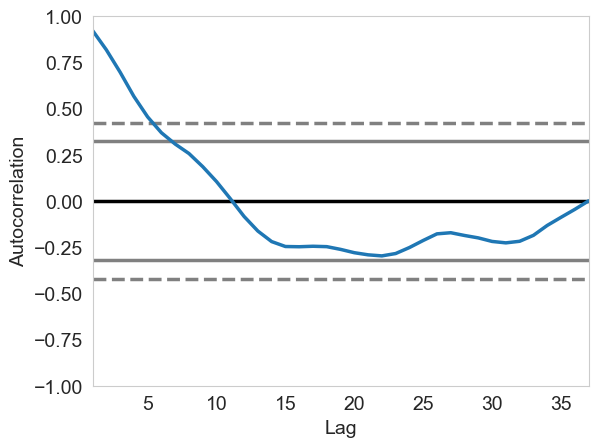

In [113]:
autocorrelation_plot(uk_TouristsNumber['TouristsNumber']);

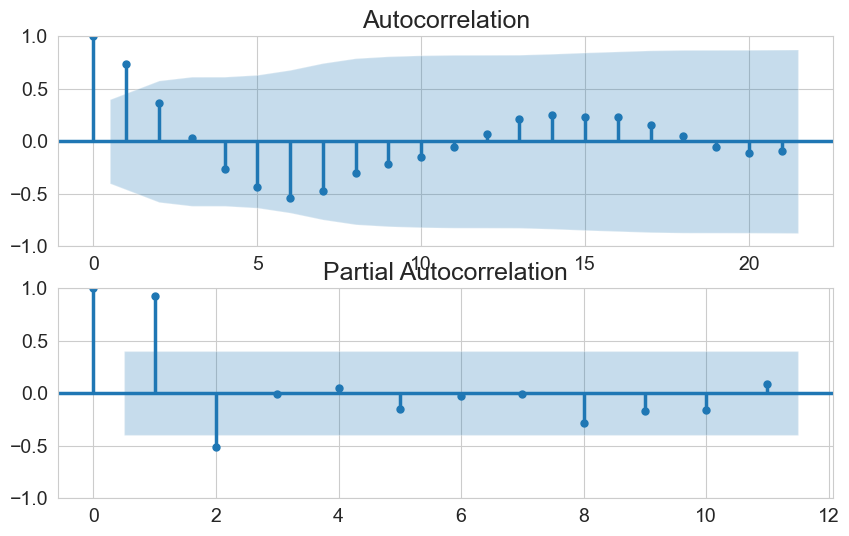

In [114]:
# ACF and PACF
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(uk_TouristsNumber['TouristsNumber'].iloc[13:],lags=21,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(uk_TouristsNumber['Seasonal First Difference'].iloc[13:],lags=11,ax=ax2)
plt.savefig('UK TouristsNumber Acf Pcf.png', dpi=300, bbox_inches="tight");

In [115]:
# the ACF and PACF plots indicates that:
# d = 1 (to make it stationary)
# q = 1 (from autocorrelation)
# p = 1 (from partial autocorrelation )
# seasonality = 12

##  ARIMA

In [116]:
# (p, d, q)
model=ARIMA(uk_TouristsNumber['TouristsNumber'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         TouristsNumber   No. Observations:                   37
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -237.703
Date:                Tue, 27 May 2025   AIC                            481.407
Time:                        08:02:51   BIC                            486.157
Sample:                    01-01-1983   HQIC                           483.065
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3877      0.204      1.897      0.058      -0.013       0.788
ma.L1          0.3153      0.260      1.212      0.226      -0.195       0.825
sigma2      3.148e+04   6103.843      5.157      0.000    1.95e+04    4.34e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                17.26
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               6.05   Skew:                            -1.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

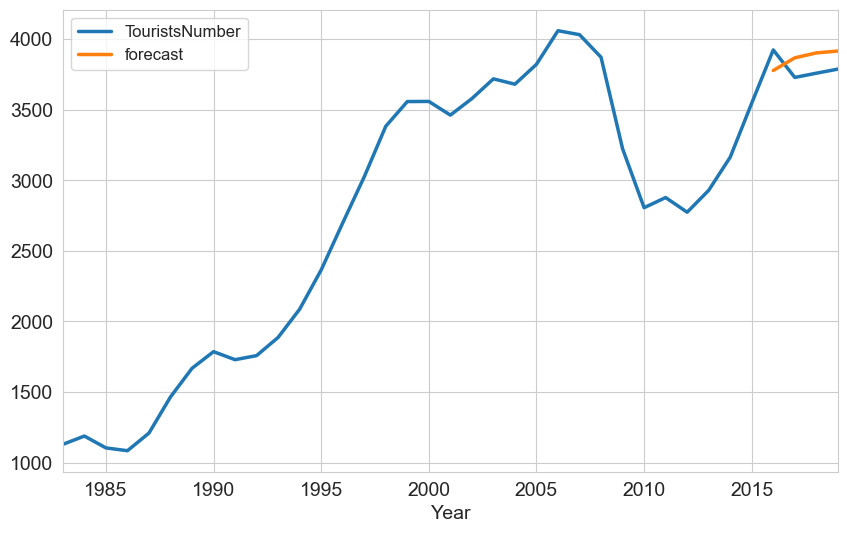

In [117]:
uk_TouristsNumber['forecast']=model_fit.predict(start='2016-01-01', end='2019-01-01',dynamic=True)
uk_TouristsNumber[['TouristsNumber','forecast']].plot(figsize=(10,6));

## SARIMA

C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


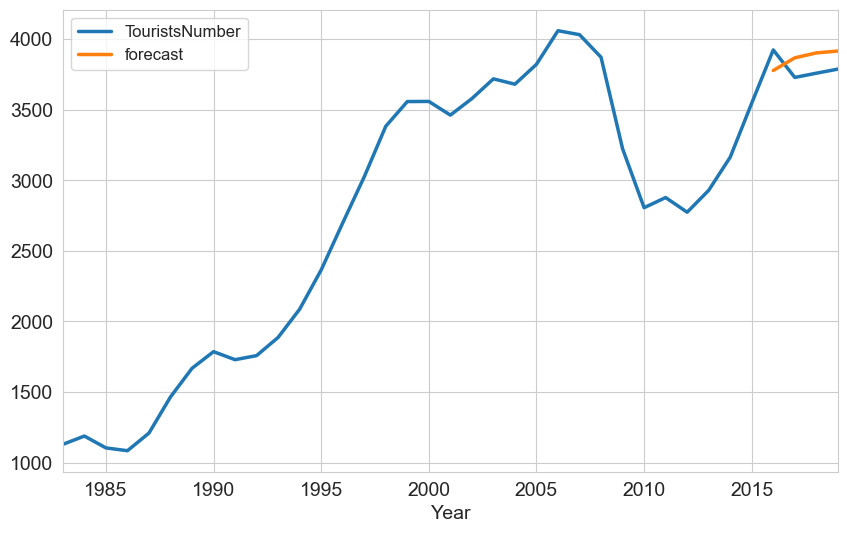

In [118]:
model=sm.tsa.statespace.SARIMAX(uk_TouristsNumber['TouristsNumber'],order=(1,1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
uk_TouristsNumber['forecast']=model_fit.predict(start='2016-01-01', end='2019-01-01',dynamic=True)
uk_TouristsNumber[['TouristsNumber','forecast']].plot(figsize=(10,6));

In [119]:
# Generate 10 future yearly dates
future_dates = [uk_TouristsNumber.index[-1] + DateOffset(years=x) for x in range(1, 11)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=uk_TouristsNumber.columns)
future_df=pd.concat([uk_TouristsNumber,future_datest_df])

MAPE (2010–2019): 6.37%


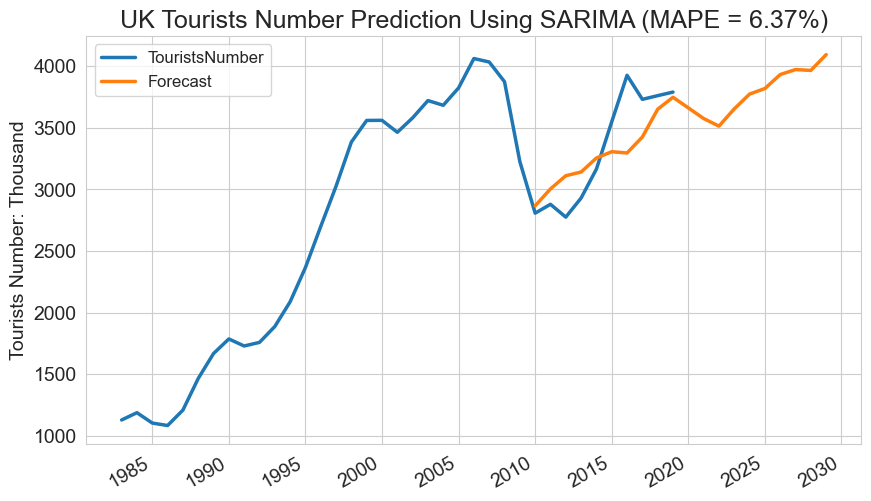

In [120]:
## mean_absolute_percentage_error (MAPE) errors are comparabel among diffirent models.
# forecast
future_df['Forecast'] = results.predict(start = '2010-01-01', end = '2029-01-01', dynamic= True)
future_df[['TouristsNumber', 'Forecast']].plot(figsize=(10, 6))
plt.ylabel("Tourists Number: Thousand")
plt.title("UK Tourists Number Prediction Using SARIMA (MAPE = 6.37%)")
plt.savefig('UK Tourists Number Prediction SARIMA.png', dpi=300, bbox_inches="tight")

mape_df = future_df[(future_df.index >= '2010-01-01') & (future_df.index <= '2019-12-31')]
mape = mean_absolute_percentage_error(mape_df['TouristsNumber'], mape_df['Forecast'])
print(f"MAPE (2010–2019): {mape:.2%}")

## Theta Forecaster

MAPE (2010–2019): 4.19%


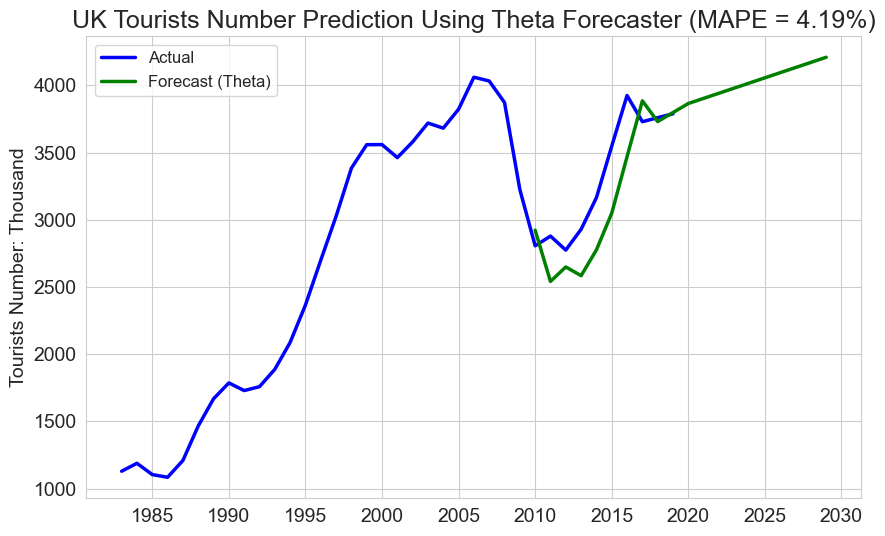

In [121]:
# Ensure index is in correct format
if not isinstance(uk_TouristsNumber.index, pd.PeriodIndex):
    uk_TouristsNumber.index = pd.to_datetime(uk_TouristsNumber.index)
    uk_TouristsNumber.index = uk_TouristsNumber.index.to_period('Y')

# Train-test split and model fit
train_series = uk_TouristsNumber.loc[:'2019', 'TouristsNumber']
model = ThetaForecaster(sp=1)  # sp=1 for yearly seasonality
model.fit(train_series)

# Forecast
forecast_years = pd.period_range(start='2010', end='2029', freq='Y')
fh = ForecastingHorizon(forecast_years, is_relative=False)
forecast = model.predict(fh)

# Plot
forecast_df = forecast.to_frame(name='Forecast')
forecast_df.index = forecast_df.index.to_timestamp()
actual_df = uk_TouristsNumber.copy()
actual_df.index = actual_df.index.to_timestamp()
combined_df = actual_df.join(forecast_df, how='outer')
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['TouristsNumber'], label='Actual', color='blue')
plt.plot(combined_df.index, combined_df['Forecast'], label='Forecast (Theta)', color='green')
plt.legend()

plt.ylabel("Tourists Number: Thousand")
plt.title("UK Tourists Number Prediction Using Theta Forecaster (MAPE = 4.19%)")
plt.savefig('UK Tourists Number Prediction Theta.png', dpi=300, bbox_inches="tight")

# MAPE
mape_df = combined_df.loc['2010':'2019'].dropna()
mape = mean_absolute_percentage_error(mape_df['TouristsNumber'], mape_df['Forecast'])
print(f"MAPE (2010–2019): {mape:.2%}")

# <b> Forecasting for the US and CANADA
### -  <b> Total Tourists Expenditure
### -  <b> Expenditure Per Tourist Per Night
### -  <b> Tourists Number

## Total Tourists Expenditure

In [122]:
pivoted_uk_us_canada.head(2)

,Year,Residence,AverageStayNights,TouristsExpenditure,TouristsNumber,ExpenditurePerTouristPerNight
0,1983-01-01,Great Britain,8.4,179.0,1129.0,18.87
1,1983-01-01,USA and Canada,10.4,131.0,292.0,43.14


In [123]:
# Forecasting the UK Tourists Expenditure
tourism_uscanada_expenditure = pivoted_uk_us_canada[pivoted_uk_us_canada['Residence'] == 'USA and Canada']
tourism_uscanada_expenditure = tourism_uscanada_expenditure[['Year', 'TouristsExpenditure']]
tourism_uscanada_expenditure.set_index('Year',inplace=True)
tourism_uscanada_expenditure

,TouristsExpenditure
Year,
1983-01-01,131.0
1984-01-01,166.0
1985-01-01,216.0
1986-01-01,173.0
1987-01-01,197.0
1988-01-01,202.0
1989-01-01,222.0
1990-01-01,208.0
1991-01-01,190.0


In [124]:
tourism_uscanada_expenditure.describe()

,TouristsExpenditure
count,37.000000
mean,630.108108
std,431.336282
min,131.000000
25%,222.000000
50%,679.000000
75%,784.000000
max,1735.000000


## Visualize the Data

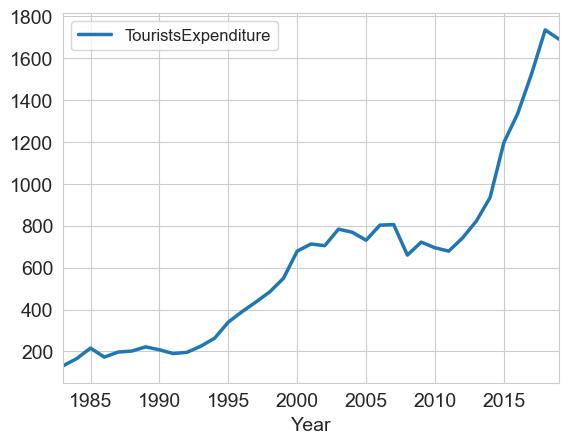

In [125]:
tourism_uscanada_expenditure.plot();

In [126]:
# The Augmented Dickey-Fuller (ADF) checks stationarity
# Ho: It is non stationary
# H1: It is stationary

def adfuller_test(expenditure):
    result = adfuller(expenditure)
    
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    for value, label in zip(result[0:4], labels):
        print(f"{label} : {value}")
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

adfuller_test(tourism_uscanada_expenditure['TouristsExpenditure'])

ADF Test Statistic : 0.9363080398676898
p-value : 0.9935463252222181
# Lags Used : 10
Number of Observations Used : 26
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


## Differencing

In [127]:
# Differencing: Subtract the previous value from the current value to stabilize the mean >>> Make stationary

tourism_uscanada_expenditure['Expenditure First Difference'] = tourism_uscanada_expenditure['TouristsExpenditure'] - tourism_uscanada_expenditure['TouristsExpenditure'].shift(1)
tourism_uscanada_expenditure['Seasonal First Difference'] = tourism_uscanada_expenditure['TouristsExpenditure'] - tourism_uscanada_expenditure['TouristsExpenditure'].shift(12)

In [128]:
## Again test dickey fuller test
adfuller_test(tourism_uscanada_expenditure['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.242398473020501
p-value : 0.0005580806335034818
# Lags Used : 4
Number of Observations Used : 20
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.


In [129]:
tourism_uscanada_expenditure.head(13)

,TouristsExpenditure,Expenditure First Difference,Seasonal First Difference
Year,,,
1983-01-01,131.0,NaN,NaN
1984-01-01,166.0,35.0,NaN
1985-01-01,216.0,50.0,NaN
1986-01-01,173.0,-43.0,NaN
1987-01-01,197.0,24.0,NaN
1988-01-01,202.0,5.0,NaN
1989-01-01,222.0,20.0,NaN
1990-01-01,208.0,-14.0,NaN
1991-01-01,190.0,-18.0,NaN


## Auto Regressive Model

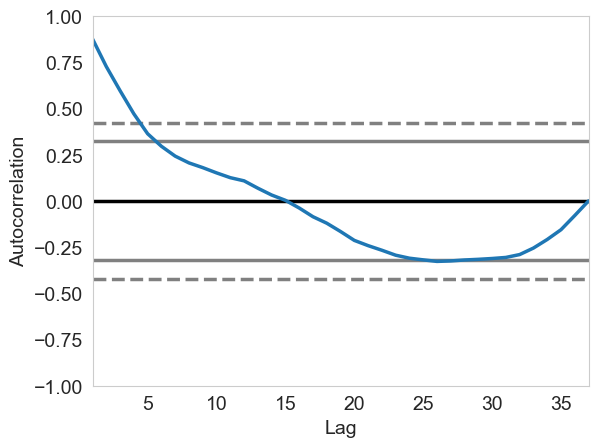

In [130]:
autocorrelation_plot(tourism_uscanada_expenditure['TouristsExpenditure']);

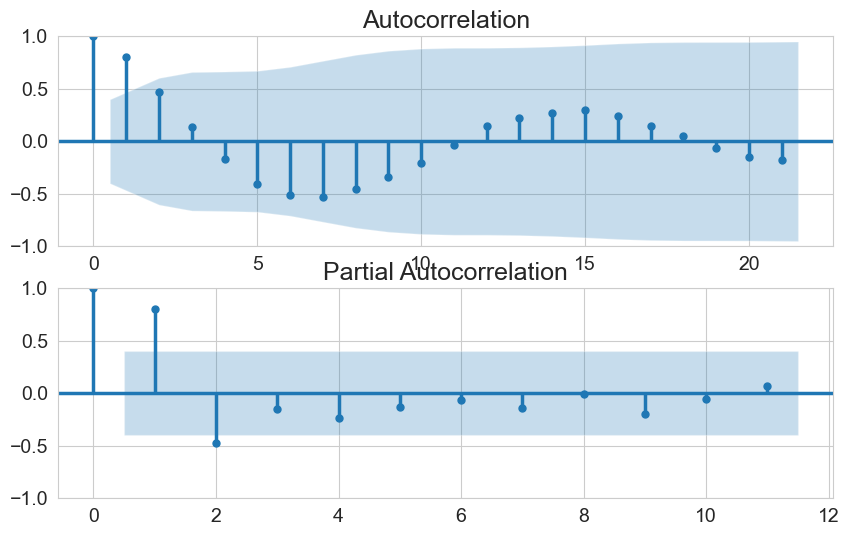

In [131]:
# ACF and PACF
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tourism_uscanada_expenditure['Seasonal First Difference'].iloc[13:],lags=21,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tourism_uscanada_expenditure['Seasonal First Difference'].iloc[13:],lags=11,ax=ax2)
plt.savefig('US Canada Tourists Expenditure Acf Pcf.png', dpi=300, bbox_inches="tight");

In [132]:
# the ACF and PACF plots indicates that:
# d = 1 (to make it stationary)
# q = 1 (from autocorrelation)
# p = 2 (from partial autocorrelation )
# seasonality = 12

##  ARIMA

In [133]:
#(p,d,q)
model=ARIMA(tourism_uscanada_expenditure['TouristsExpenditure'],order=(2,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     TouristsExpenditure   No. Observations:                   37
Model:                  ARIMA(2, 1, 1)   Log Likelihood                -204.719
Date:                 Tue, 27 May 2025   AIC                            417.438
Time:                         08:03:01   BIC                            423.772
Sample:                     01-01-1983   HQIC                           419.649
                          - 01-01-2019                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6220      0.657      0.946      0.344      -0.666       1.910
ar.L2          0.1758      0.447      0.393      0.694      -0.701       1.052
ma.L1         -0.3156      0.638     -0.495      0.621      -1.565       0.934
sigma2      5018.8939    999.588      5.021      0.000    3059.738    6978.050
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 6.21
Prob(Q):                              0.63   Prob(JB):                         0.04
Heteroskedasticity (H):              10.07   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

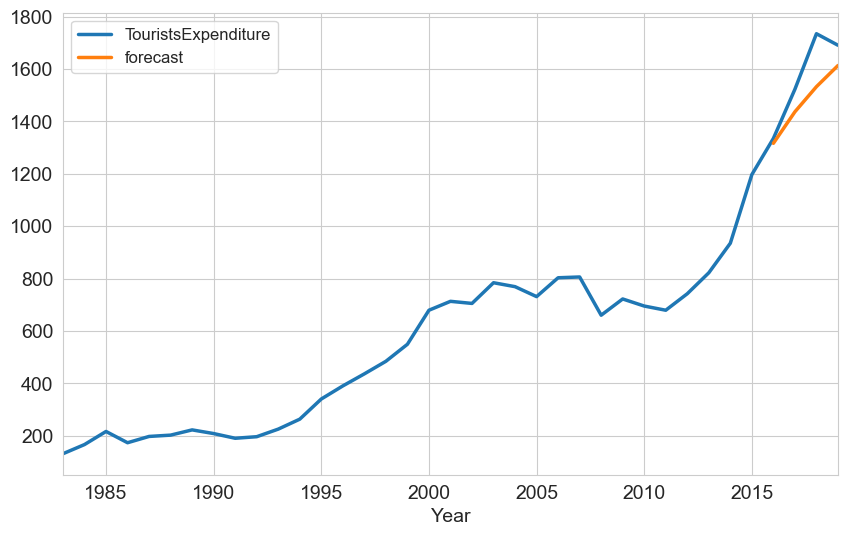

In [134]:
tourism_uscanada_expenditure['forecast']=model_fit.predict(start='2016-01-01', end='2019-01-01',dynamic=True)
tourism_uscanada_expenditure[['TouristsExpenditure','forecast']].plot(figsize=(10,6));

## SARIMA

C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


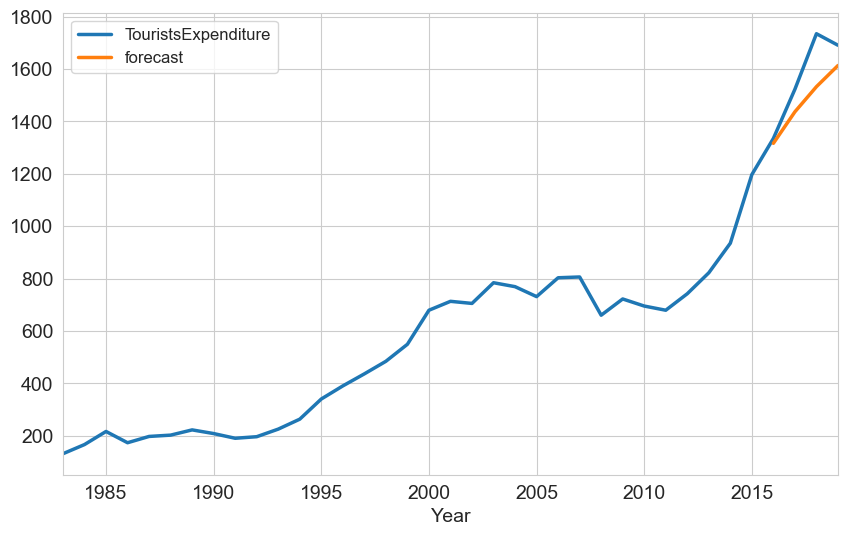

In [135]:
model=sm.tsa.statespace.SARIMAX(tourism_uscanada_expenditure['TouristsExpenditure'],order=(2,1,1),seasonal_order=(2,1,1,12))
results=model.fit()
tourism_uscanada_expenditure['forecast']=model_fit.predict(start='2016-01-01', end='2019-01-01',dynamic=True)
tourism_uscanada_expenditure[['TouristsExpenditure','forecast']].plot(figsize=(10,6));

In [136]:
# Generate 10 future yearly dates
future_dates = [tourism_uscanada_expenditure.index[-1] + DateOffset(years=x) for x in range(1, 11)]
future_dates
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=tourism_uscanada_expenditure.columns)
future_df=pd.concat([tourism_uscanada_expenditure,future_datest_df])

MAPE (2010–2019): 22.96%


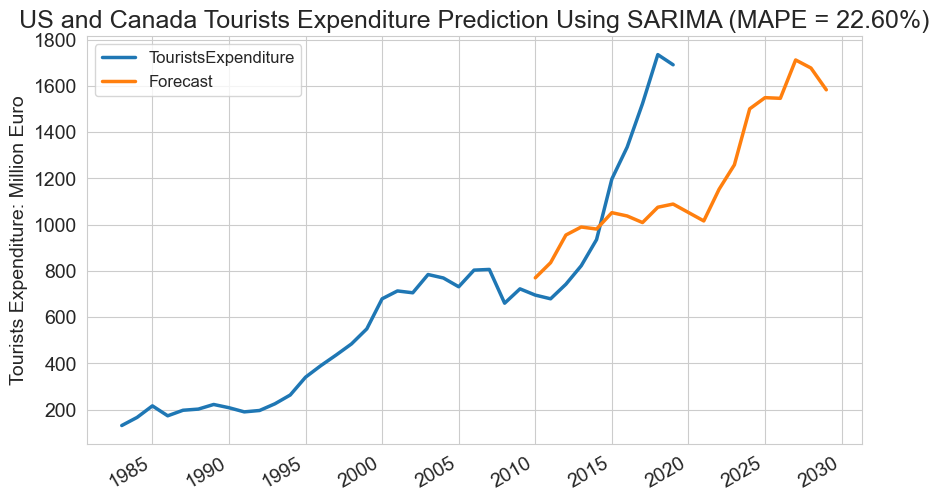

In [137]:
### mean_absolute_percentage_error (MAPE) errors are comparabel among diffirent models.
# forecast
future_df['Forecast'] = results.predict(start = '2010-01-01', end = '2029-01-01', dynamic= True)
future_df[['TouristsExpenditure', 'Forecast']].plot(figsize=(10, 6))
plt.ylabel("Tourists Expenditure: Million Euro")
plt.title("US and Canada Tourists Expenditure Prediction Using SARIMA (MAPE = 22.60%)")
plt.savefig('US Canada Tourists Expenditure Forecast SARIMA.png', dpi=300, bbox_inches="tight")

# MAPE
mape_df = future_df[(future_df.index >= '2010-01-01') & (future_df.index <= '2019-12-31')]
mape = mean_absolute_percentage_error(mape_df['TouristsExpenditure'], mape_df['Forecast'])
print(f"MAPE (2010–2019): {mape:.2%}")

## Theta Forecaster

MAPE (2010–2019): 10.65%


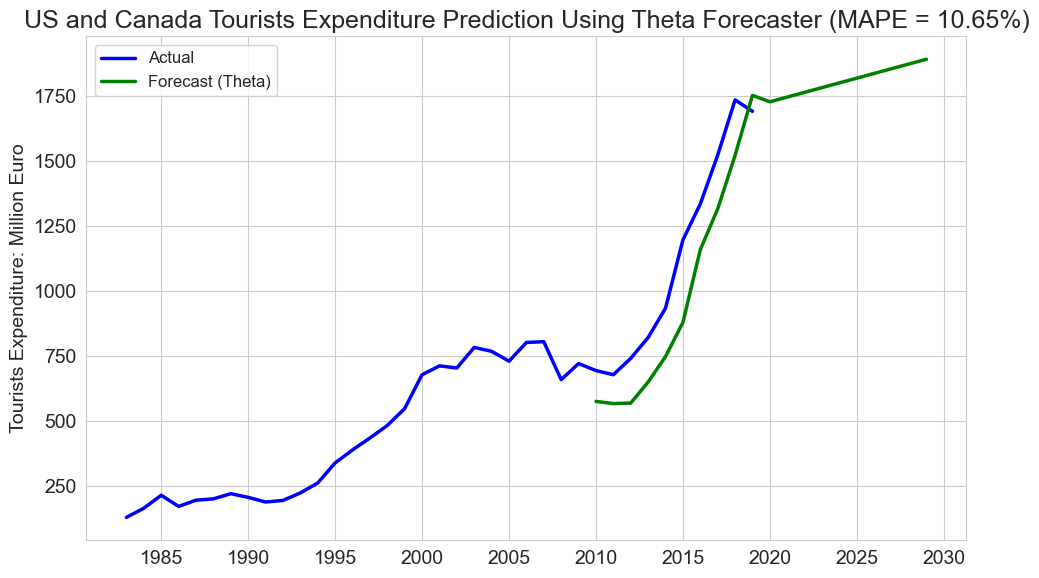

In [138]:
# Ensure index is in correct format
if not isinstance(tourism_uscanada_expenditure.index, pd.PeriodIndex):
    tourism_uscanada_expenditure.index = pd.to_datetime(tourism_uscanada_expenditure.index)
    tourism_uscanada_expenditure.index = tourism_uscanada_expenditure.index.to_period('Y')

# Train-test split and model fit
train_series = tourism_uscanada_expenditure.loc[:'2019', 'TouristsExpenditure']
model = ThetaForecaster(sp=1)  # sp=1 for yearly seasonality
model.fit(train_series)

# Forecast
forecast_years = pd.period_range(start='2010', end='2029', freq='Y')
fh = ForecastingHorizon(forecast_years, is_relative=False)
forecast = model.predict(fh)

# Plot
forecast_df = forecast.to_frame(name='Forecast')
forecast_df.index = forecast_df.index.to_timestamp()
actual_df = tourism_uscanada_expenditure.copy()
actual_df.index = actual_df.index.to_timestamp()
combined_df = actual_df.join(forecast_df, how='outer')
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['TouristsExpenditure'], label='Actual', color='blue')
plt.plot(combined_df.index, combined_df['Forecast'], label='Forecast (Theta)', color='green')
plt.ylabel("Tourists Expenditure: Million Euro")
plt.title("US and Canada Tourists Expenditure Prediction Using Theta Forecaster (MAPE = 10.65%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("US Canada Tourists Expenditure Forecast Theta.png", dpi=300, bbox_inches="tight")

# MAPE
mape_df = combined_df.loc['2010':'2019'].dropna()
mape = mean_absolute_percentage_error(mape_df['TouristsExpenditure'], mape_df['Forecast'])
print(f"MAPE (2010–2019): {mape:.2%}")

## Forecasting the US and CANADA Per Tourist Per Night Tourists Expenditure

In [139]:
pivoted_uk_us_canada.head(2)

,Year,Residence,AverageStayNights,TouristsExpenditure,TouristsNumber,ExpenditurePerTouristPerNight
0,1983-01-01,Great Britain,8.4,179.0,1129.0,18.87
1,1983-01-01,USA and Canada,10.4,131.0,292.0,43.14


In [140]:
# Forecasting the US and CANADA Per Tourist Per Night Tourists Expenditure
uscanada_perTouristperNight = pivoted_uk_us_canada[pivoted_uk_us_canada['Residence'] == 'USA and Canada']
uscanada_perTouristperNight = uscanada_perTouristperNight[['Year', 'ExpenditurePerTouristPerNight']]
uscanada_perTouristperNight.set_index('Year',inplace=True)
uscanada_perTouristperNight

,ExpenditurePerTouristPerNight
Year,
1983-01-01,43.14
1984-01-01,49.74
1985-01-01,52.42
1986-01-01,47.24
1987-01-01,46.76
1988-01-01,47.98
1989-01-01,47.96
1990-01-01,45.64
1991-01-01,48.73


In [141]:
uscanada_perTouristperNight.describe()

,ExpenditurePerTouristPerNight
count,37.000000
mean,71.087838
std,20.973548
min,43.140000
25%,52.340000
50%,70.610000
75%,85.830000
max,110.270000


## Visualize the Data

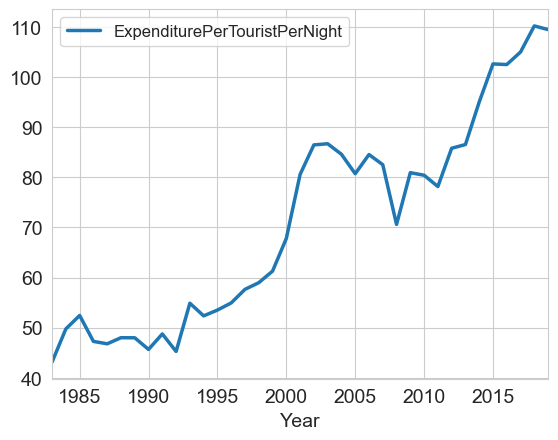

In [142]:
uscanada_perTouristperNight.plot();

In [143]:
# The Augmented Dickey-Fuller (ADF) checks stationarity
# Ho: It is non stationary
# H1: It is stationary

def adfuller_test(expenditure):
    result = adfuller(expenditure)
    
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    for value, label in zip(result[0:4], labels):
        print(f"{label} : {value}")
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

adfuller_test(uscanada_perTouristperNight['ExpenditurePerTouristPerNight'])

ADF Test Statistic : -0.11790868154074835
p-value : 0.9476252860771602
# Lags Used : 0
Number of Observations Used : 36
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


## Differencing

In [144]:
# Differencing: Subtract the previous value from the current value to stabilize the mean >>> Make stationary
uscanada_perTouristperNight['PerTouristPerNight First Difference'] = uscanada_perTouristperNight['ExpenditurePerTouristPerNight'] - uscanada_perTouristperNight['ExpenditurePerTouristPerNight'].shift(1)
uscanada_perTouristperNight['Seasonal First Difference'] = uscanada_perTouristperNight['ExpenditurePerTouristPerNight'] - uscanada_perTouristperNight['ExpenditurePerTouristPerNight'].shift(12)

In [145]:
## Again test dickey fuller test
adfuller_test(uscanada_perTouristperNight['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.853373815829303
p-value : 0.05104485986044545
# Lags Used : 9
Number of Observations Used : 15
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [146]:
# Differencing:  d = 2
uscanada_perTouristperNight['PerTouristPerNight Second Difference'] = uscanada_perTouristperNight['PerTouristPerNight First Difference'] - uscanada_perTouristperNight['PerTouristPerNight First Difference'].shift(1)
uscanada_perTouristperNight['Seasonal Second Difference'] = uscanada_perTouristperNight['PerTouristPerNight First Difference'] - uscanada_perTouristperNight['PerTouristPerNight First Difference'].shift(12)

In [147]:
## Again test dickey fuller test
adfuller_test(uscanada_perTouristperNight['Seasonal Second Difference'].dropna())

ADF Test Statistic : -1.7030026324069096
p-value : 0.42956609813713353
# Lags Used : 2
Number of Observations Used : 21
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [148]:
# Differencing:  d = 3
uscanada_perTouristperNight['PerTouristPerNight Third Difference'] = uscanada_perTouristperNight['PerTouristPerNight Second Difference'] - uscanada_perTouristperNight['PerTouristPerNight Second Difference'].shift(1)
uscanada_perTouristperNight['Seasonal Third Difference'] = uscanada_perTouristperNight['PerTouristPerNight Second Difference'] - uscanada_perTouristperNight['PerTouristPerNight Second Difference'].shift(12)

In [149]:
## Again test dickey fuller test
adfuller_test(uscanada_perTouristperNight['Seasonal Third Difference'].dropna())

ADF Test Statistic : -3.160344686936031
p-value : 0.022397922483136982
# Lags Used : 3
Number of Observations Used : 19
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.


In [150]:
uscanada_perTouristperNight.head(15)

,ExpenditurePerTouristPerNight,PerTouristPerNight First Difference,Seasonal First Difference,PerTouristPerNight Second Difference,Seasonal Second Difference,PerTouristPerNight Third Difference,Seasonal Third Difference
Year,,,,,,,
1983-01-01,43.14,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-01,49.74,6.60,NaN,NaN,NaN,NaN,NaN
1985-01-01,52.42,2.68,NaN,-3.92,NaN,NaN,NaN
1986-01-01,47.24,-5.18,NaN,-7.86,NaN,-3.94,NaN
1987-01-01,46.76,-0.48,NaN,4.70,NaN,12.56,NaN
1988-01-01,47.98,1.22,NaN,1.70,NaN,-3.00,NaN
1989-01-01,47.96,-0.02,NaN,-1.24,NaN,-2.94,NaN
1990-01-01,45.64,-2.32,NaN,-2.30,NaN,-1.06,NaN
1991-01-01,48.73,3.09,NaN,5.41,NaN,7.71,NaN


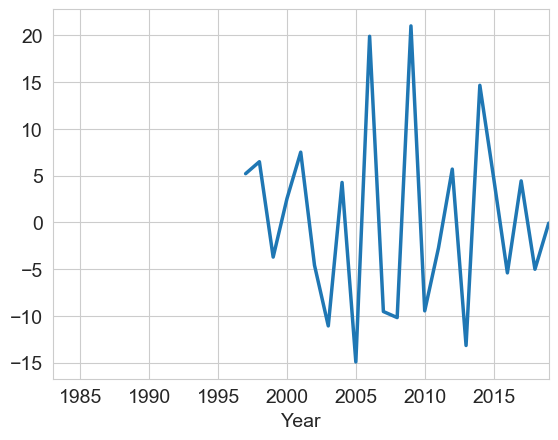

In [151]:
uscanada_perTouristperNight['Seasonal Third Difference'].plot();

## Auto Regressive Model

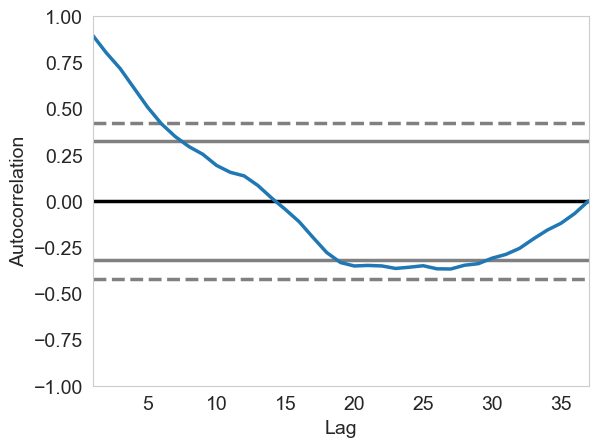

In [152]:
autocorrelation_plot(uscanada_perTouristperNight['ExpenditurePerTouristPerNight']);

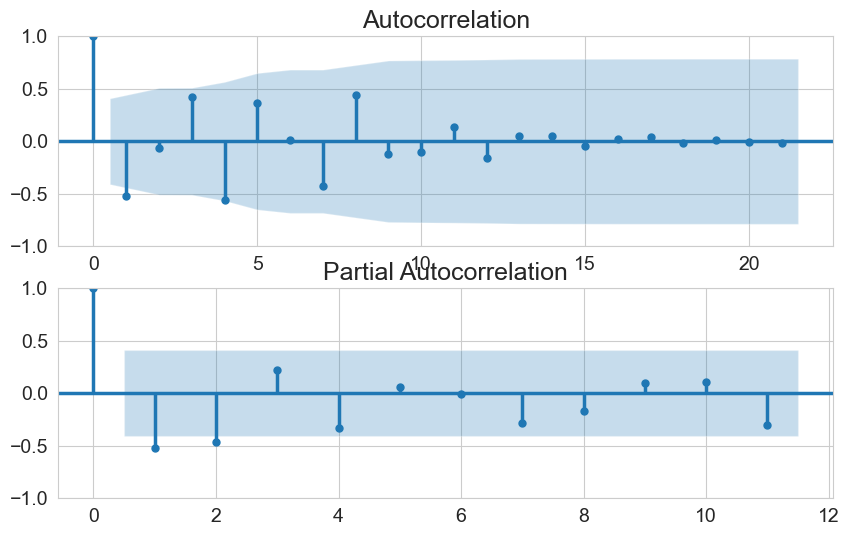

In [153]:
# ACF and PACF
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(uscanada_perTouristperNight['Seasonal Third Difference'].iloc[14:],lags=21,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(uscanada_perTouristperNight['Seasonal Third Difference'].iloc[14:],lags=11,ax=ax2)
plt.savefig('US Canada PerTouristPerNight Expenditure Acf Pcf.png', dpi=300, bbox_inches="tight");

In [154]:
# the ACF and PACF plots indicates that:
# d = 3 (to make it stationary)
# q = 1 (from autocorrelation)
# p = 2 (from partial autocorrelation )
# seasonality = 12

## ARIMA

In [155]:
#(p,d,q)
model=ARIMA(uscanada_perTouristperNight['ExpenditurePerTouristPerNight'],order=(2,3,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     ExpenditurePerTouristPerNight   No. Observations:                   37
Model:                            ARIMA(2, 3, 1)   Log Likelihood                -108.821
Date:                           Tue, 27 May 2025   AIC                            225.642
Time:                                   08:03:11   BIC                            231.748
Sample:                               01-01-1983   HQIC                           227.724
                                    - 01-01-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7532      0.162     -4.647      0.000      -1.071      -0.436
ar.L2         -0.4666      0.175     -2.666      0.008      -0.810      -0.124
ma.L1         -0.9998     46.110     -0.022      0.983     -91.374      89.374
sigma2        29.6627   1366.444      0.022      0.983   -2648.518    2707.844
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.84   Prob(JB):                         0.96
Heteroskedasticity (H):               0.98   Skew:                             0.04
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

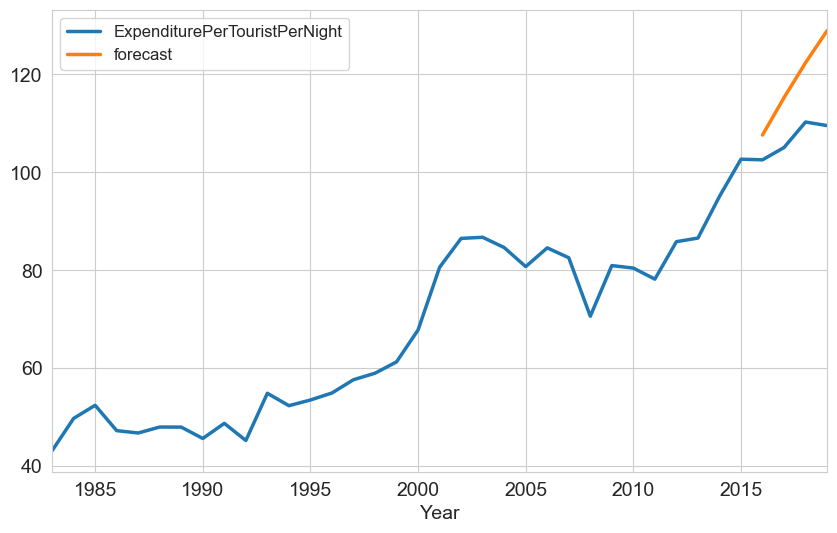

In [156]:
uscanada_perTouristperNight['forecast']=model_fit.predict(start='2016-01-01', end='2019-01-01',dynamic=True)
uscanada_perTouristperNight[['ExpenditurePerTouristPerNight','forecast']].plot(figsize=(10,6));

## SARIMA

C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


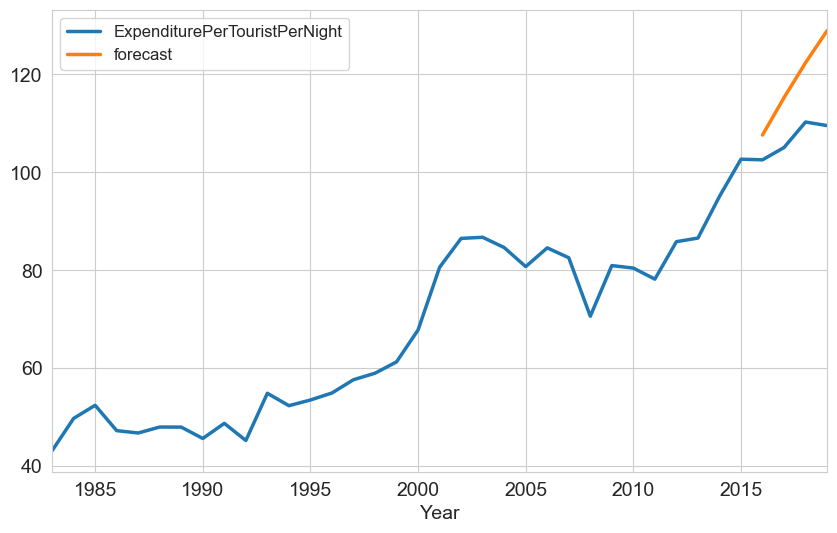

In [157]:
model=sm.tsa.statespace.SARIMAX(uscanada_perTouristperNight['ExpenditurePerTouristPerNight'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()
uscanada_perTouristperNight['forecast']=model_fit.predict(start='2016-01-01', end='2019-01-01',dynamic=True)
uscanada_perTouristperNight[['ExpenditurePerTouristPerNight','forecast']].plot(figsize=(10,6));

In [158]:
# Generate 10 future yearly dates
future_dates = [uscanada_perTouristperNight.index[-1] + DateOffset(years=x) for x in range(1, 11)]
future_dates
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=uscanada_perTouristperNight.columns)
future_df=pd.concat([uscanada_perTouristperNight,future_datest_df])

MAPE (2010–2019): 5.66%


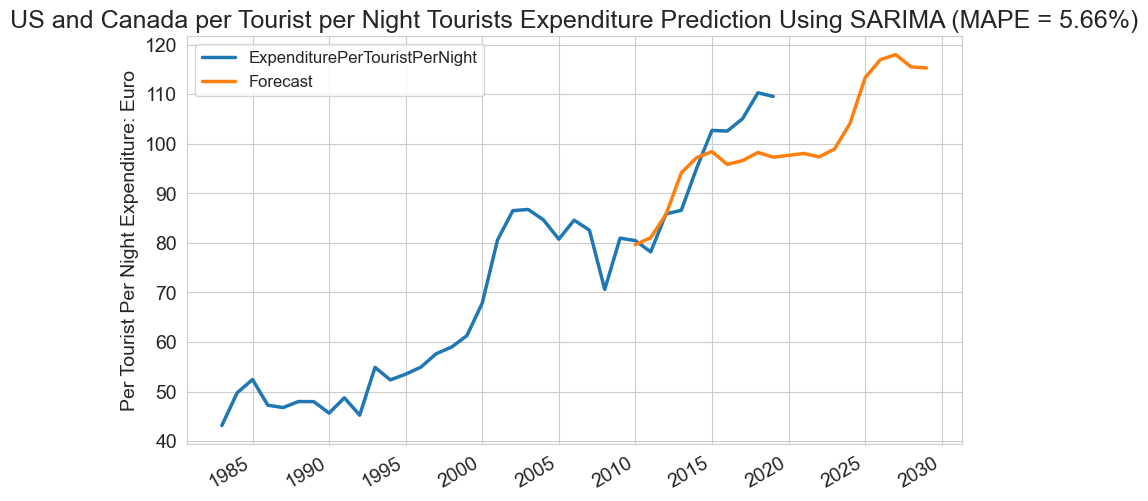

In [159]:
### mean_absolute_percentage_error (MAPE) errors are comparabel among diffirent models.
# forecast
future_df['Forecast'] = results.predict(start = '2010-01-01', end = '2029-01-01', dynamic= True)
future_df[['ExpenditurePerTouristPerNight', 'Forecast']].plot(figsize=(10, 6))
plt.ylabel("Per Tourist Per Night Expenditure: Euro")
plt.title("US and Canada per Tourist per Night Tourists Expenditure Prediction Using SARIMA (MAPE = 5.66%)")
plt.savefig('US Canada perTouristperNight Expenditure Forecast SARIMA.png', dpi=300, bbox_inches="tight")
# MAPE
mape_df = future_df[(future_df.index >= '2010-01-01') & (future_df.index <= '2019-12-31')]
mape = mean_absolute_percentage_error(mape_df['ExpenditurePerTouristPerNight'], mape_df['Forecast'])
print(f"MAPE (2010–2019): {mape:.2%}")

In [160]:
## Theta Forecaster

MAPE (2010–2019): 2.78%


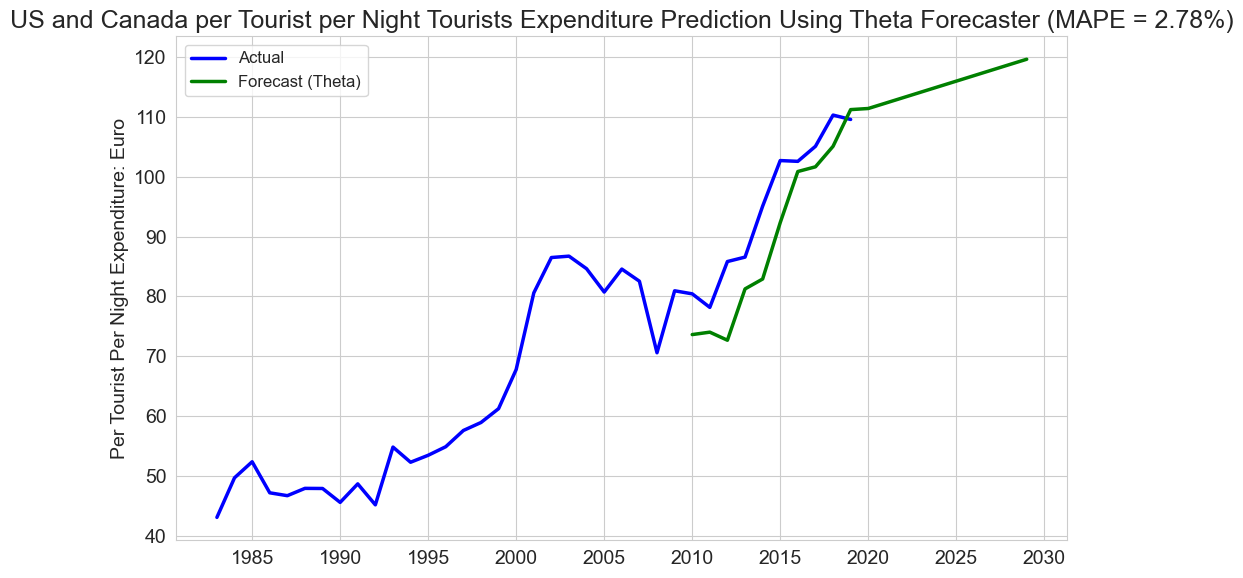

In [161]:
# Ensure index is in correct format
if not isinstance(uscanada_perTouristperNight.index, pd.PeriodIndex):
    uscanada_perTouristperNight.index = pd.to_datetime(uscanada_perTouristperNight.index)
    uscanada_perTouristperNight.index = uscanada_perTouristperNight.index.to_period('Y')

# Train-test split and model fit
train_series = uscanada_perTouristperNight.loc[:'2019', 'ExpenditurePerTouristPerNight']
model = ThetaForecaster(sp=1)  # sp=1 for yearly seasonality
model.fit(train_series)

# Forecast
forecast_years = pd.period_range(start='2010', end='2029', freq='Y')
fh = ForecastingHorizon(forecast_years, is_relative=False)
forecast = model.predict(fh)

# Plot
forecast_df = forecast.to_frame(name='Forecast')
forecast_df.index = forecast_df.index.to_timestamp()
actual_df = uscanada_perTouristperNight.copy()
actual_df.index = actual_df.index.to_timestamp()
combined_df = actual_df.join(forecast_df, how='outer')
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['ExpenditurePerTouristPerNight'], label='Actual', color='blue')
plt.plot(combined_df.index, combined_df['Forecast'], label='Forecast (Theta)', color='green')
plt.ylabel("Per Tourist Per Night Expenditure: Euro")
plt.title("US and Canada per Tourist per Night Tourists Expenditure Prediction Using Theta Forecaster (MAPE = 2.78%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("US Canada perTouristperNight Expenditure Forecast Theta.png", dpi=300, bbox_inches="tight")

# MAPE
mape_df = combined_df.loc['2010':'2019'].dropna()
mape = mean_absolute_percentage_error(mape_df['ExpenditurePerTouristPerNight'], mape_df['Forecast'])
print(f"MAPE (2010–2019): {mape:.2%}")

## Forecasting the US and CANADA Tourists Number

In [162]:
pivoted_uk_us_canada.head(2)

,Year,Residence,AverageStayNights,TouristsExpenditure,TouristsNumber,ExpenditurePerTouristPerNight
0,1983-01-01,Great Britain,8.4,179.0,1129.0,18.87
1,1983-01-01,USA and Canada,10.4,131.0,292.0,43.14


In [163]:
# Forecasting the US and CANADA Tourists Number
uscanada_TouristsNumber = pivoted_uk_us_canada[pivoted_uk_us_canada['Residence'] == 'USA and Canada']
uscanada_TouristsNumber = uscanada_TouristsNumber[['Year', 'TouristsNumber']]
uscanada_TouristsNumber.set_index('Year',inplace=True)
uscanada_TouristsNumber

,TouristsNumber
Year,
1983-01-01,292.0
1984-01-01,324.0
1985-01-01,404.0
1986-01-01,327.0
1987-01-01,383.0
1988-01-01,401.0
1989-01-01,417.0
1990-01-01,434.0
1991-01-01,342.0


In [164]:
uscanada_TouristsNumber.describe()

,TouristsNumber
count,37.000000
mean,916.000000
std,549.403464
min,292.000000
25%,417.000000
50%,912.000000
75%,1043.000000
max,2412.000000


## Visualize the Data

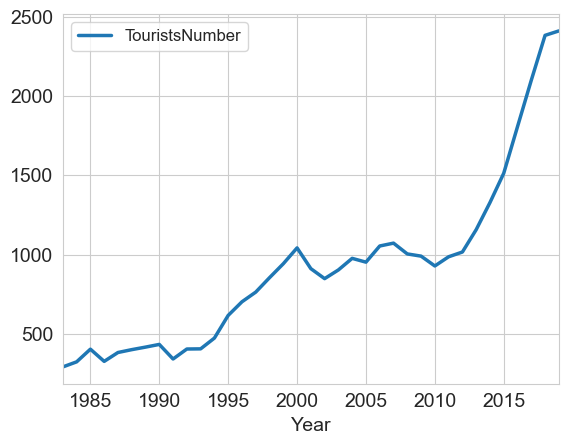

In [165]:
uscanada_TouristsNumber.plot();

In [166]:
# The Augmented Dickey-Fuller (ADF) checks stationarity
# Ho: It is non stationary
# H1: It is stationary

def adfuller_test(expenditure):
    result = adfuller(expenditure)
    
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    for value, label in zip(result[0:4], labels):
        print(f"{label} : {value}")
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

adfuller_test(uscanada_TouristsNumber['TouristsNumber'])

ADF Test Statistic : 0.6170041420905393
p-value : 0.9880273385542627
# Lags Used : 1
Number of Observations Used : 35
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


## Differencing

In [167]:
# Differencing: Subtract the previous value from the current value to stabilize the mean >>> Make stationary
uscanada_TouristsNumber['TouristsNumber First Difference'] = uscanada_TouristsNumber['TouristsNumber'] - uscanada_TouristsNumber['TouristsNumber'].shift(1)
uscanada_TouristsNumber['Seasonal First Difference'] = uscanada_TouristsNumber['TouristsNumber'] - uscanada_TouristsNumber['TouristsNumber'].shift(12)

In [168]:
## Again test dickey fuller test
adfuller_test(uscanada_TouristsNumber['TouristsNumber'].dropna())

ADF Test Statistic : 0.6170041420905393
p-value : 0.9880273385542627
# Lags Used : 1
Number of Observations Used : 35
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [169]:
# Differencing:  d = 2
uscanada_TouristsNumber['TouristsNumber Second Difference'] = uscanada_TouristsNumber['TouristsNumber First Difference'] - uscanada_TouristsNumber['TouristsNumber First Difference'].shift(1)
uscanada_TouristsNumber['Seasonal Second Difference'] = uscanada_TouristsNumber['TouristsNumber First Difference'] - uscanada_TouristsNumber['TouristsNumber First Difference'].shift(12)

In [170]:
## Again test dickey fuller test
adfuller_test(uscanada_TouristsNumber['Seasonal Second Difference'].dropna())

ADF Test Statistic : -2.6145870129502815
p-value : 0.0900197501962437
# Lags Used : 0
Number of Observations Used : 23
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [171]:
# Differencing:  d = 3
uscanada_TouristsNumber['TouristsNumber Third Difference'] = uscanada_TouristsNumber['TouristsNumber Second Difference'] - uscanada_TouristsNumber['TouristsNumber Second Difference'].shift(1)
uscanada_TouristsNumber['Seasonal Third Difference'] = uscanada_TouristsNumber['TouristsNumber Second Difference'] - uscanada_TouristsNumber['TouristsNumber Second Difference'].shift(12)

In [172]:
## Again test dickey fuller test
adfuller_test(uscanada_TouristsNumber['Seasonal Third Difference'].dropna())

ADF Test Statistic : -5.952745945575281
p-value : 2.128083553861862e-07
# Lags Used : 0
Number of Observations Used : 22
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary.


In [173]:
uscanada_TouristsNumber.head(15)

,TouristsNumber,TouristsNumber First Difference,Seasonal First Difference,TouristsNumber Second Difference,Seasonal Second Difference,TouristsNumber Third Difference,Seasonal Third Difference
Year,,,,,,,
1983-01-01,292.0,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-01,324.0,32.0,NaN,NaN,NaN,NaN,NaN
1985-01-01,404.0,80.0,NaN,48.0,NaN,NaN,NaN
1986-01-01,327.0,-77.0,NaN,-157.0,NaN,-205.0,NaN
1987-01-01,383.0,56.0,NaN,133.0,NaN,290.0,NaN
1988-01-01,401.0,18.0,NaN,-38.0,NaN,-171.0,NaN
1989-01-01,417.0,16.0,NaN,-2.0,NaN,36.0,NaN
1990-01-01,434.0,17.0,NaN,1.0,NaN,3.0,NaN
1991-01-01,342.0,-92.0,NaN,-109.0,NaN,-110.0,NaN


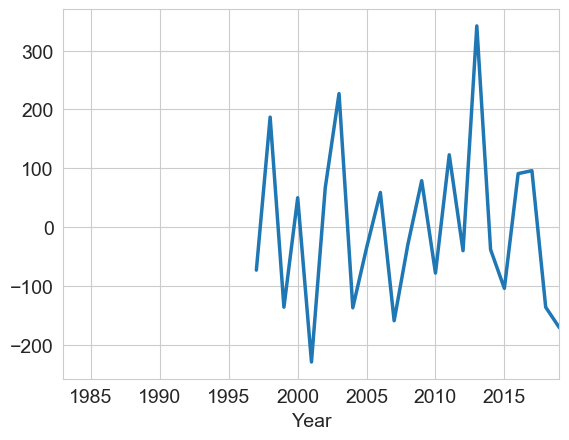

In [174]:
uscanada_TouristsNumber['Seasonal Third Difference'].plot();

## Auto Regressive Model

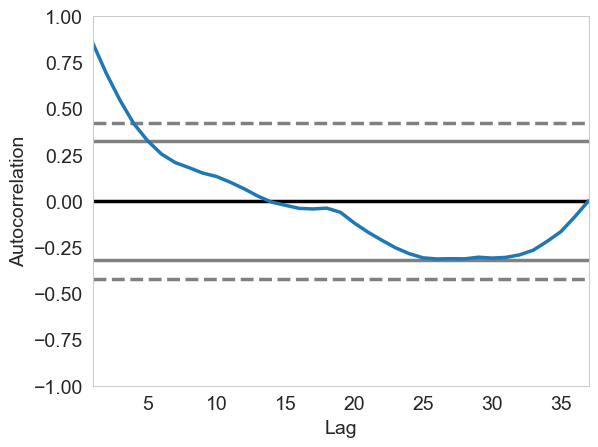

In [175]:
autocorrelation_plot(uscanada_TouristsNumber['TouristsNumber']); 

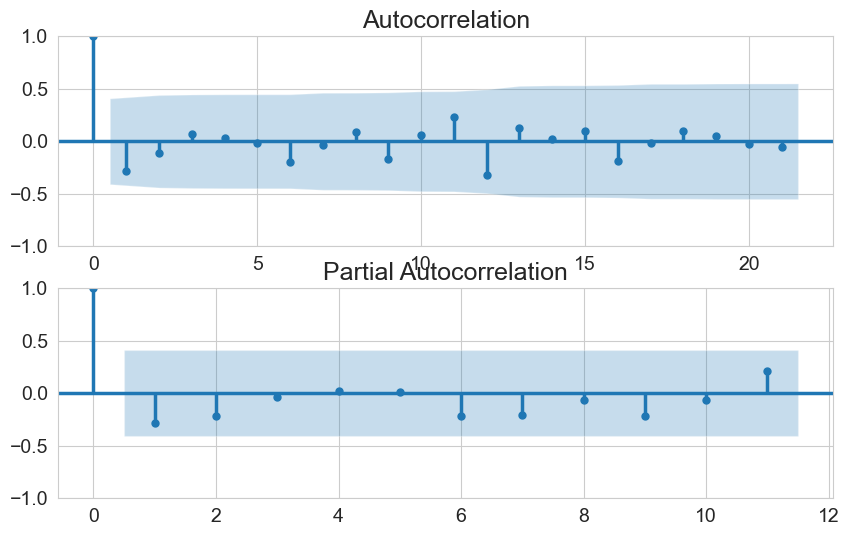

In [176]:
# ACF and PACF
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(uscanada_TouristsNumber['Seasonal Third Difference'].iloc[14:],lags=21,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(uscanada_TouristsNumber['Seasonal Third Difference'].iloc[14:],lags=11,ax=ax2)
plt.savefig('US Canada TouristsNumber Acf Pcf.png', dpi=300, bbox_inches="tight");

In [177]:
# the ACF and PACF plots indicates that:
# d = 3 (to make it stationary)
# q = 0 (from autocorrelation)
# p = 0 (from partial autocorrelation )
# seasonality = 12

##  ARIMA

In [178]:
#(p,d,q)
model=ARIMA(uscanada_TouristsNumber['TouristsNumber'],order=(0,3,0))
model_fit=model.fit()
model_fit.summary()

C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         TouristsNumber   No. Observations:                   37
Model:                 ARIMA(0, 3, 0)   Log Likelihood                -218.948
Date:                Tue, 27 May 2025   AIC                            439.896
Time:                        08:03:22   BIC                            441.422
Sample:                    01-01-1983   HQIC                           440.416
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.294e+04   7133.686      3.216      0.001    8962.497    3.69e+04
===================================================================================
Ljung-Box (L1) (Q):                  12.75   Jarque-Bera (JB):                 1.38
Prob(Q):                              0.00   Prob(JB):                         0.50
Heteroskedasticity (H):               0.59   Skew:                             0.34
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

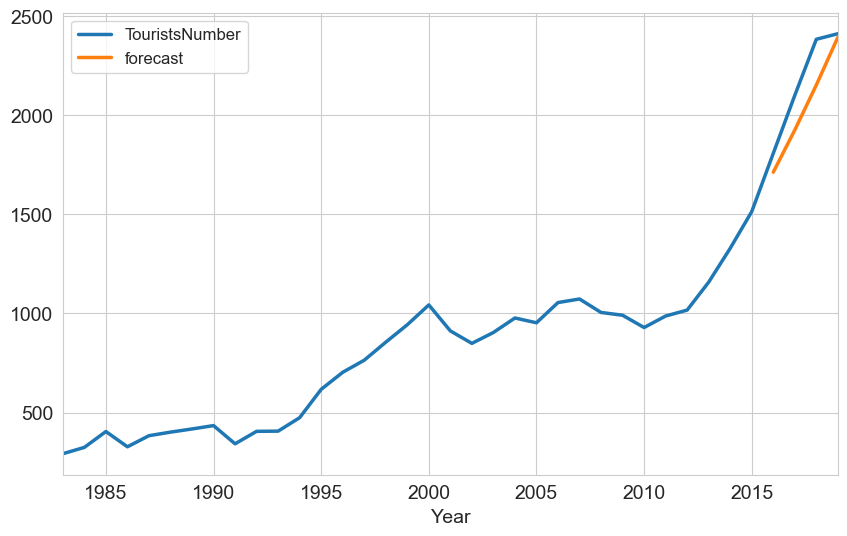

In [179]:
uscanada_TouristsNumber['forecast']=model_fit.predict(start='2016-01-01', end='2019-01-01',dynamic=True)
uscanada_TouristsNumber[['TouristsNumber','forecast']].plot(figsize=(10,6));

## SARIMA

C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\User1\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


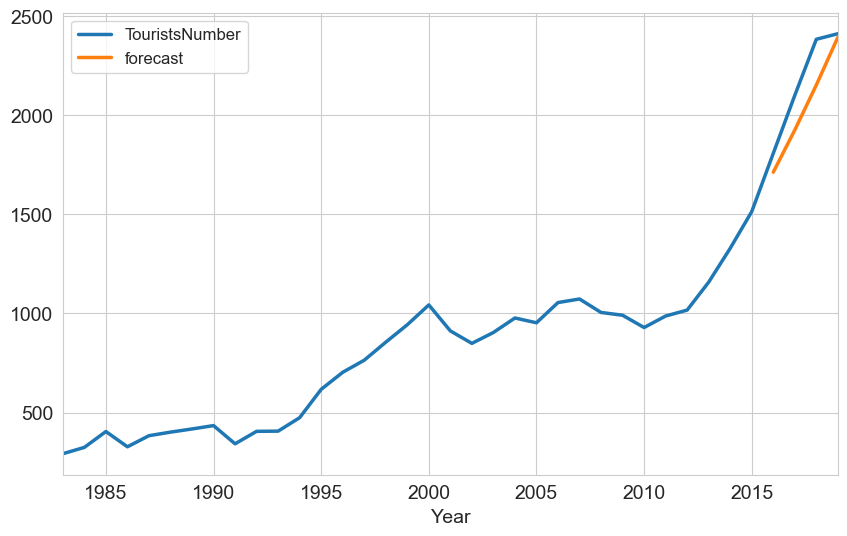

In [180]:
model=sm.tsa.statespace.SARIMAX(uscanada_TouristsNumber['TouristsNumber'],order=(0,1,0),seasonal_order=(0,1,0,12))
results=model.fit()
uscanada_TouristsNumber['forecast']=model_fit.predict(start='2016-01-01', end='2019-01-01',dynamic=True)
uscanada_TouristsNumber[['TouristsNumber','forecast']].plot(figsize=(10,6));

In [181]:
# Generate 10 future yearly dates
future_dates = [uscanada_TouristsNumber.index[-1] + DateOffset(years=x) for x in range(1, 11)]
future_dates
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=uscanada_TouristsNumber.columns)
future_df=pd.concat([uscanada_TouristsNumber,future_datest_df])

MAPE (2010–2019): 27.54%


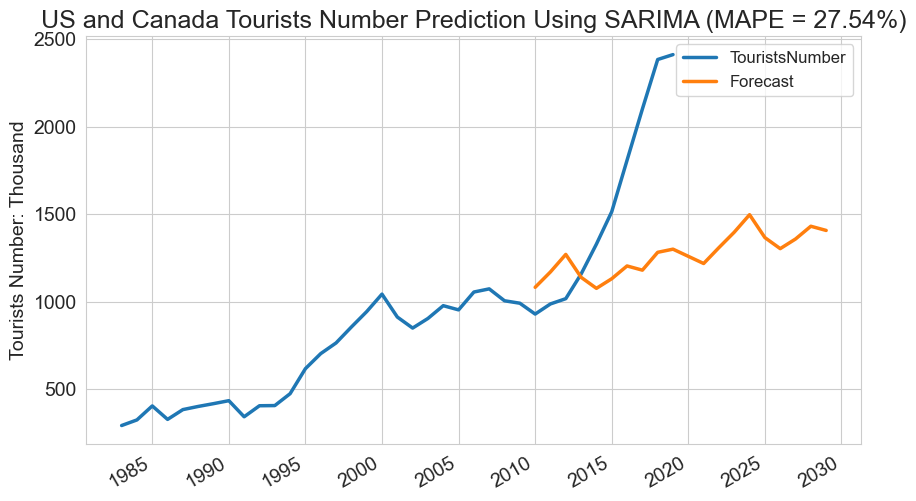

In [182]:
### mean_absolute_percentage_error (MAPE) errors are comparabel among diffirent models.
# forecast
future_df['Forecast'] = results.predict(start = '2010-01-01', end = '2029-01-01', dynamic= True)
future_df[['TouristsNumber', 'Forecast']].plot(figsize=(10, 6))
plt.ylabel("Tourists Number: Thousand")
plt.title("US and Canada Tourists Number Prediction Using SARIMA (MAPE = 27.54%)")
plt.savefig('US Canada TouristsNumber SARIMA.png', dpi=300, bbox_inches="tight")
# MAPE
mape_df = future_df[(future_df.index >= '2010-01-01') & (future_df.index <= '2019-12-31')]
mape = mean_absolute_percentage_error(mape_df['TouristsNumber'], mape_df['Forecast'])
print(f"MAPE (2010–2019): {mape:.2%}")

## Theta Forecaster

MAPE (2010–2019): 11.52%


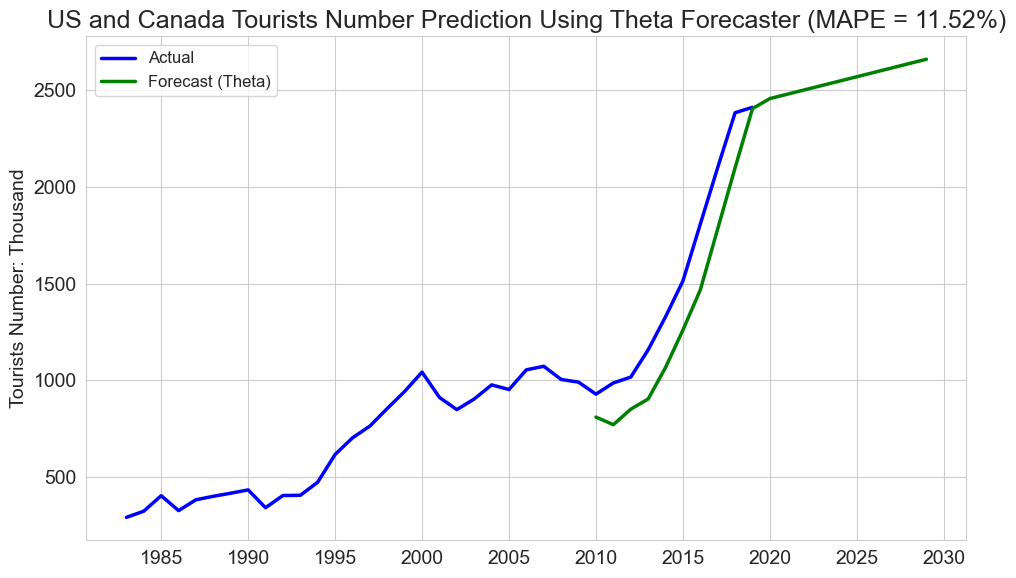

In [183]:
# Ensure index is in correct format
if not isinstance(uscanada_TouristsNumber.index, pd.PeriodIndex):
    uscanada_TouristsNumber.index = pd.to_datetime(uscanada_TouristsNumber.index)
    uscanada_TouristsNumber.index = uscanada_TouristsNumber.index.to_period('Y')

# Train-test split and model fit
train_series = uscanada_TouristsNumber.loc[:'2019', 'TouristsNumber']
model = ThetaForecaster(sp=1)  # sp=1 for yearly seasonality
model.fit(train_series)

# Forecast
forecast_years = pd.period_range(start='2010', end='2029', freq='Y')
fh = ForecastingHorizon(forecast_years, is_relative=False)
forecast = model.predict(fh)

# Plot
forecast_df = forecast.to_frame(name='Forecast')
forecast_df.index = forecast_df.index.to_timestamp()
actual_df = uscanada_TouristsNumber.copy()
actual_df.index = actual_df.index.to_timestamp()
combined_df = actual_df.join(forecast_df, how='outer')
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['TouristsNumber'], label='Actual', color='blue')
plt.plot(combined_df.index, combined_df['Forecast'], label='Forecast (Theta)', color='green')
plt.ylabel("Tourists Number: Thousand")
plt.title("US and Canada Tourists Number Prediction Using Theta Forecaster (MAPE = 11.52%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("US Canada TouristsNumber Forecast Theta.png", dpi=300, bbox_inches="tight")

# MAPE
mape_df = combined_df.loc['2010':'2019'].dropna()
mape = mean_absolute_percentage_error(mape_df['TouristsNumber'], mape_df['Forecast'])
print(f"MAPE (2010–2019): {mape:.2%}")

<b> ##################################################################################################################

## <b> Model Evaluation and Comparison

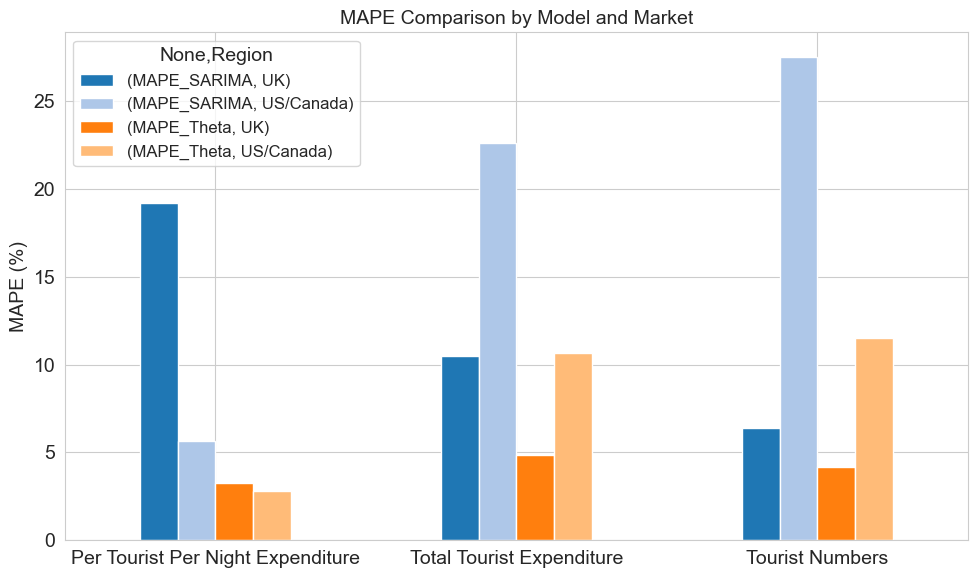

In [184]:
# Collect the MAPE values in a dictionary
data = {
    'Indicator': ['Total Tourist Expenditure', 'Per Tourist Per Night Expenditure', 'Tourist Numbers',
                  'Total Tourist Expenditure', 'Per Tourist Per Night Expenditure', 'Tourist Numbers'],
    'Region': ['UK', 'UK', 'UK', 'US/Canada', 'US/Canada', 'US/Canada'],
    'MAPE_SARIMA': [10.48, 19.18, 6.37, 22.60, 5.66, 27.54],
    'MAPE_Theta': [4.87, 3.26, 4.19, 10.65, 2.78, 11.52]
}
# Create DataFrame
df = pd.DataFrame(data)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
df.pivot(index='Indicator', columns='Region', values=['MAPE_SARIMA', 'MAPE_Theta']).plot(
    kind='bar', ax=ax, color=['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'])

ax.set_title('MAPE Comparison by Model and Market', fontsize=14)
ax.set_ylabel('MAPE (%)')
ax.set_xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("MAPE_Comparison.png", dpi=300, bbox_inches="tight");

## <b> 8. Challenges Encountered and Solutions

See the CA3 Word report

## <b> 9. Findings, Recommendations, and Conclusion

See the CA3 Word report

## <b> References <b>

- Arunraj, N.S., Ahrens, D. and Fernandes, M., 2016. Application of the SARIMAX model to forecast daily sales in the food retail industry. International Journal of Operations Research and Information Systems (IJORIS), 7(2), pp.1-21.
- Central Statistics Office, 2020a. TMA09 - Overseas Trips (incl. Expenditure) to Ireland - data.gov.ie (Date updated 2020-09-15). Available at: https://data.gov.ie/dataset/tma09-overseas-trips-incl-expenditure-to-ireland (Accessed: 20 October 2024).
- Central Statistics Office, 2020b. TMA06 - Overseas Visits to Ireland (Date updated 2020-05-14). Available at: https://data.cso.ie/ (Accessed: 13 April 2025).
- Cheer, J.M. and Lew, A.A., 2017. Understanding tourism resilience: Adapting to social, political, and economic change. In Tourism, resilience and sustainability (pp. 3-17). Routledge.
- Government of Ireland, 2024. Tourism Policy Framework 2025–2030. Available at: https://www.gov.ie/pdf/?file=https://assets.gov.ie/311416/2b0fbb57-62df-4b6c-b90f-4af38fff290e.pdf#page=null (Accessed: 24 November 2024).
- Gunter, U. and Önder, I., 2015. ‘Forecasting international city tourism demand for Paris: Accuracy of uni- and multivariate models employing monthly data’, Tourism Management, 46, pp. 123–135. Available at: https://doi.org/10.1016/j.tourman.2014.06.017.
- Irish Tourism Industry Confederation, 2024. ‘VISION 2030 – An Irish Tourism Strategy for Growth’, Irish Tourism Industry Confederation - ITIC. Available at: https://www.itic.ie/vision-2030/ (Accessed: 24 November 2024).
- Isik, M., 2025.  ‘Airline Passenger Forecasting’. Available at: https://kaggle.com/code/mehmetisik/airline-passenger-forecasting (Accessed: 19 January 2025).
- McKinney, W., 2012. Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. O’Reilly Media, Inc.
- Perktold, . et al., 2024. The Theta Model. ‘statsmodels/statsmodels: Release 0.14.2’. Zenodo. Available at: https://doi.org/10.5281/ZENODO.593847.
- Shearer, C., 2000. The CRISP-DM model: the new blueprint for data mining. Journal of Data Warehousing, 5(4), pp.13-22.
- Song, H. and Li, G., 2008. ‘Tourism demand modelling and forecasting—A review of recent research’, Tourism Management, 29(2), pp. 203–220. Available at: https://doi.org/10.1016/j.tourman.2007.07.016.
- Song, H., Qiu, R.T.R. and Park, J., 2019. ‘A review of research on tourism demand forecasting: Launching the Annals of Tourism Research Curated Collection on tourism demand forecasting’, Annals of Tourism Research, 75, pp. 338–362. Available at: https://doi.org/10.1016/j.annals.2018.12.001.
- Weiss, N., 2016. Introductory Statistics, MyLab Revision, Global Edition. 10th edition. Boston; Columbus; Indianapolis, New York: Pearson.